# Purpose of this notebook

This notebook is used to visualise the features from the numpy arrays extracted by extract_arrays.ipynb. It is not required in the data processing pipeline.

In [14]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import random

In [15]:
FEATURES_PATH = "data/my_20_sec_features-AWS_4_host-2023_04_04__11_34_29.npy"
LABELS_PATH = "data/my_20_sec_labels-AWS_4_host-2023_04_04__11_34_29.npy"
SITES_PATH = "VPN_client_scripts/urls/top_100_updated.csv"

SEED = 42

In [16]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)

with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)

In [17]:
sites_df = pd.read_csv(SITES_PATH, names=["ranking", "site"])
sites = list(sites_df.site)
sites[:10]

['google.com',
 'youtube.com',
 'facebook.com',
 'baidu.com',
 'instagram.com',
 'avito.ru',
 'qq.com',
 'wikipedia.org',
 'bing.com',
 'bilibili.com']

In [34]:
import collections
print([item for item, count in collections.Counter(sites).items() if count > 1])

['microsoft.com', 'weibo.com']


In [18]:
for i, label in enumerate(labels):
  if label not in sites:
    labels[i] = "Other"

In [28]:
count = 0
for label in np.unique(labels, axis=0):
  count += 1

print(f"Num nuique = {count}")

Other
Num nuique = 99


In [32]:
print("Sites not in capture:")
for site in np.unique(labels):
    if site not in sites:
        print(site)


Sites not in capture:
Other


In [20]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([['115.com', '31'],
       ['1688.com', '27'],
       ['360.cn', '39'],
       ['3dmgame.com', '31'],
       ['52pojie.cn', '32'],
       ['Other', '1786'],
       ['adobe.com', '38'],
       ['alibaba.com', '34'],
       ['aliexpress.com', '30'],
       ['alipay.com', '31'],
       ['amazon.com', '26'],
       ['amazonaws.com', '35'],
       ['apple.com', '37'],
       ['avito.ru', '27'],
       ['baidu.com', '37'],
       ['bilibili.com', '25'],
       ['bing.com', '26'],
       ['booking.com', '42'],
       ['canva.com', '30'],
       ['chaturbate.com', '31'],
       ['chsi.com.cn', '32'],
       ['cnblogs.com', '37'],
       ['csdn.net', '45'],
       ['deepl.com', '32'],
       ['discord.com', '32'],
       ['disneyplus.com', '32'],
       ['douban.com', '30'],
       ['douyu.com', '37'],
       ['duckduckgo.com', '30'],
       ['dzen.ru', '31'],
       ['ebay.com', '38'],
       ['espn.com', '24'],
       ['etsy.com', '36'],
       ['facebook.com', '27'],
       ['fandom.co

([<matplotlib.patches.Wedge at 0x181c0f0d0>,
 [Text(-0.022577347761400687, 1.199787590937688, '115.com'),
  Text(-0.06479114072670523, 1.1982496017455346, '1688.com'),
  Text(-0.11272694377717259, 1.1946935323113868, '360.cn'),
  Text(-0.16336860760174657, 1.188827446709684, '3dmgame.com'),
  Text(-0.20869659679787791, 1.181713049130365, '52pojie.cn'),
  Text(-1.1490133004274181, 0.3460757654631312, 'Other'),
  Text(-0.8234507544802999, -0.872885361857916, 'adobe.com'),
  Text(-0.7845310535032608, -0.9080258950542457, 'alibaba.com'),
  Text(-0.7486757922880375, -0.9378083802365382, 'aliexpress.com'),
  Text(-0.7134490592769307, -0.9648784585723027, 'alipay.com'),
  Text(-0.6796475076976805, -0.9889789003210996, 'amazon.com'),
  Text(-0.6425739672388863, -1.0134587789480531, 'amazonaws.com'),
  Text(-0.5976857545644834, -1.0405631834687812, 'apple.com'),
  Text(-0.5568243214654099, -1.062989499018963, 'avito.ru'),
  Text(-0.515122781085016, -1.0838120318612627, 'baidu.com'),
  Text(-0.4

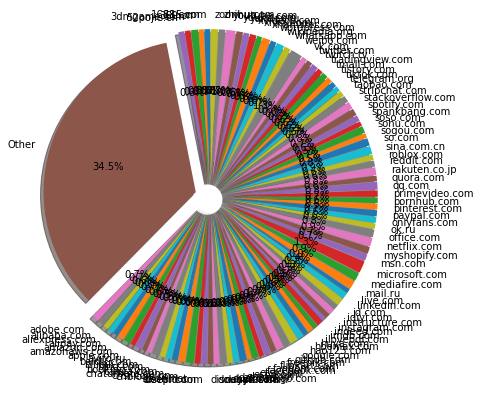

In [21]:
explode = [0.1] * len(frequencies[:,0])
plt.figure(figsize=(7,7))
plt.pie(frequencies[:,1], labels=frequencies[:,0], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

In [22]:
max = features.max()
print(f"Max value: {max}")
features_scaled = features/max

Max value: 2932.0


(array([2.828e+03, 6.280e+02, 3.540e+02, 2.190e+02, 1.660e+02, 1.410e+02,
        1.160e+02, 9.600e+01, 9.100e+01, 6.200e+01, 5.200e+01, 4.200e+01,
        3.600e+01, 3.100e+01, 3.400e+01, 2.600e+01, 2.700e+01, 1.200e+01,
        2.400e+01, 2.000e+01, 1.200e+01, 2.100e+01, 1.600e+01, 1.200e+01,
        1.300e+01, 2.700e+01, 1.700e+01, 3.000e+00, 1.700e+01, 1.100e+01,
        6.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.0000e+00, 6.0600e+01, 1.1920e+02, 1.7780e+02, 2.3640e+02,
        2.9500e+02, 3.5360e+02, 4.1220e+02, 4.7080e+02, 5.2940e+02,
        5.8800e+02, 6.4660e+02, 7.0520e+02, 7.6380e+02, 8.2240e+02,
        8.8100e+02, 9.3960e+02, 9.9820e+02, 1.0568e+03, 1.1154e+03,
        1.1740e+03, 1.2326e+03, 1.2912e+03, 1.3498e+03, 1.4084e+03,
        1.4670e+03, 1.5256e+03, 1.58

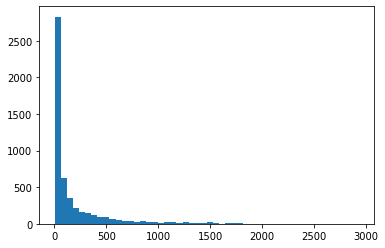

In [23]:
maxes = [arr.max() for arr in features]
plt.hist(maxes, bins=50)

In [24]:
unique_labels = np.unique(labels)

In [25]:
labels_df = pd.DataFrame(labels, columns=["label"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

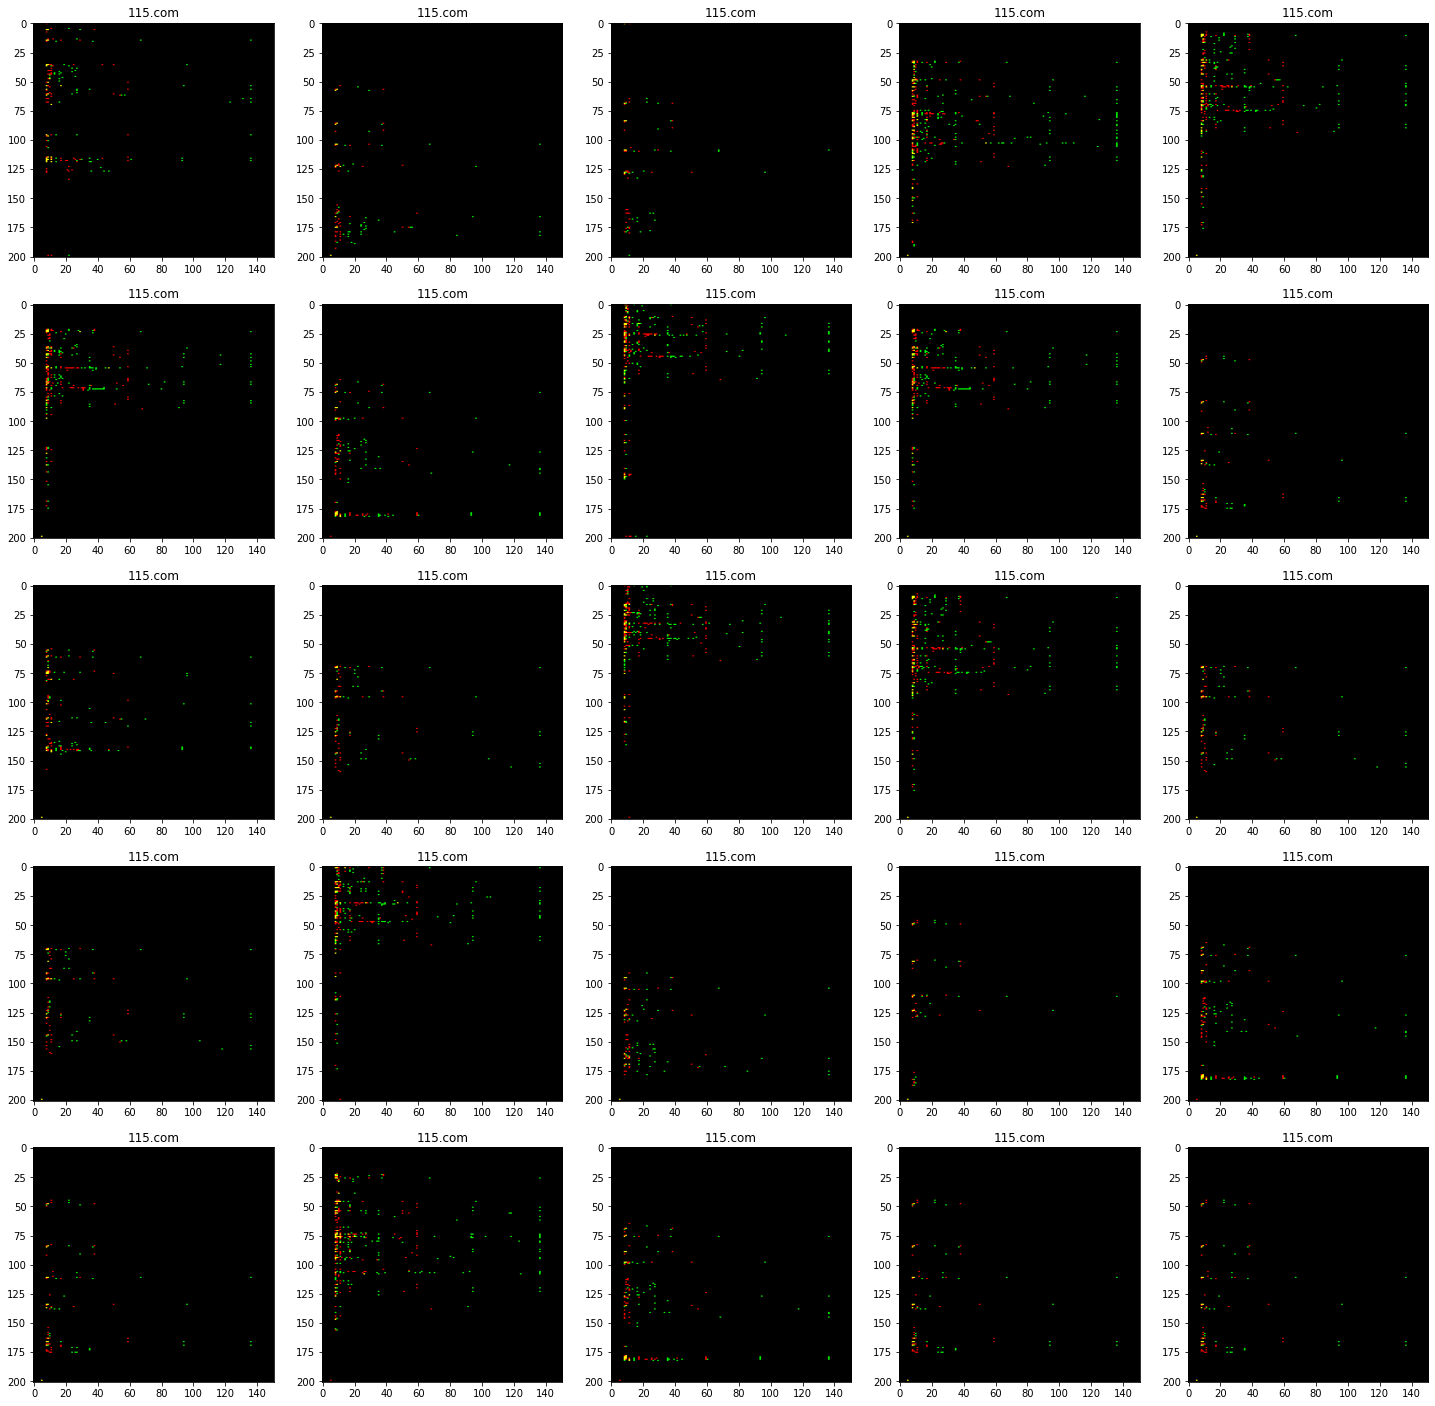

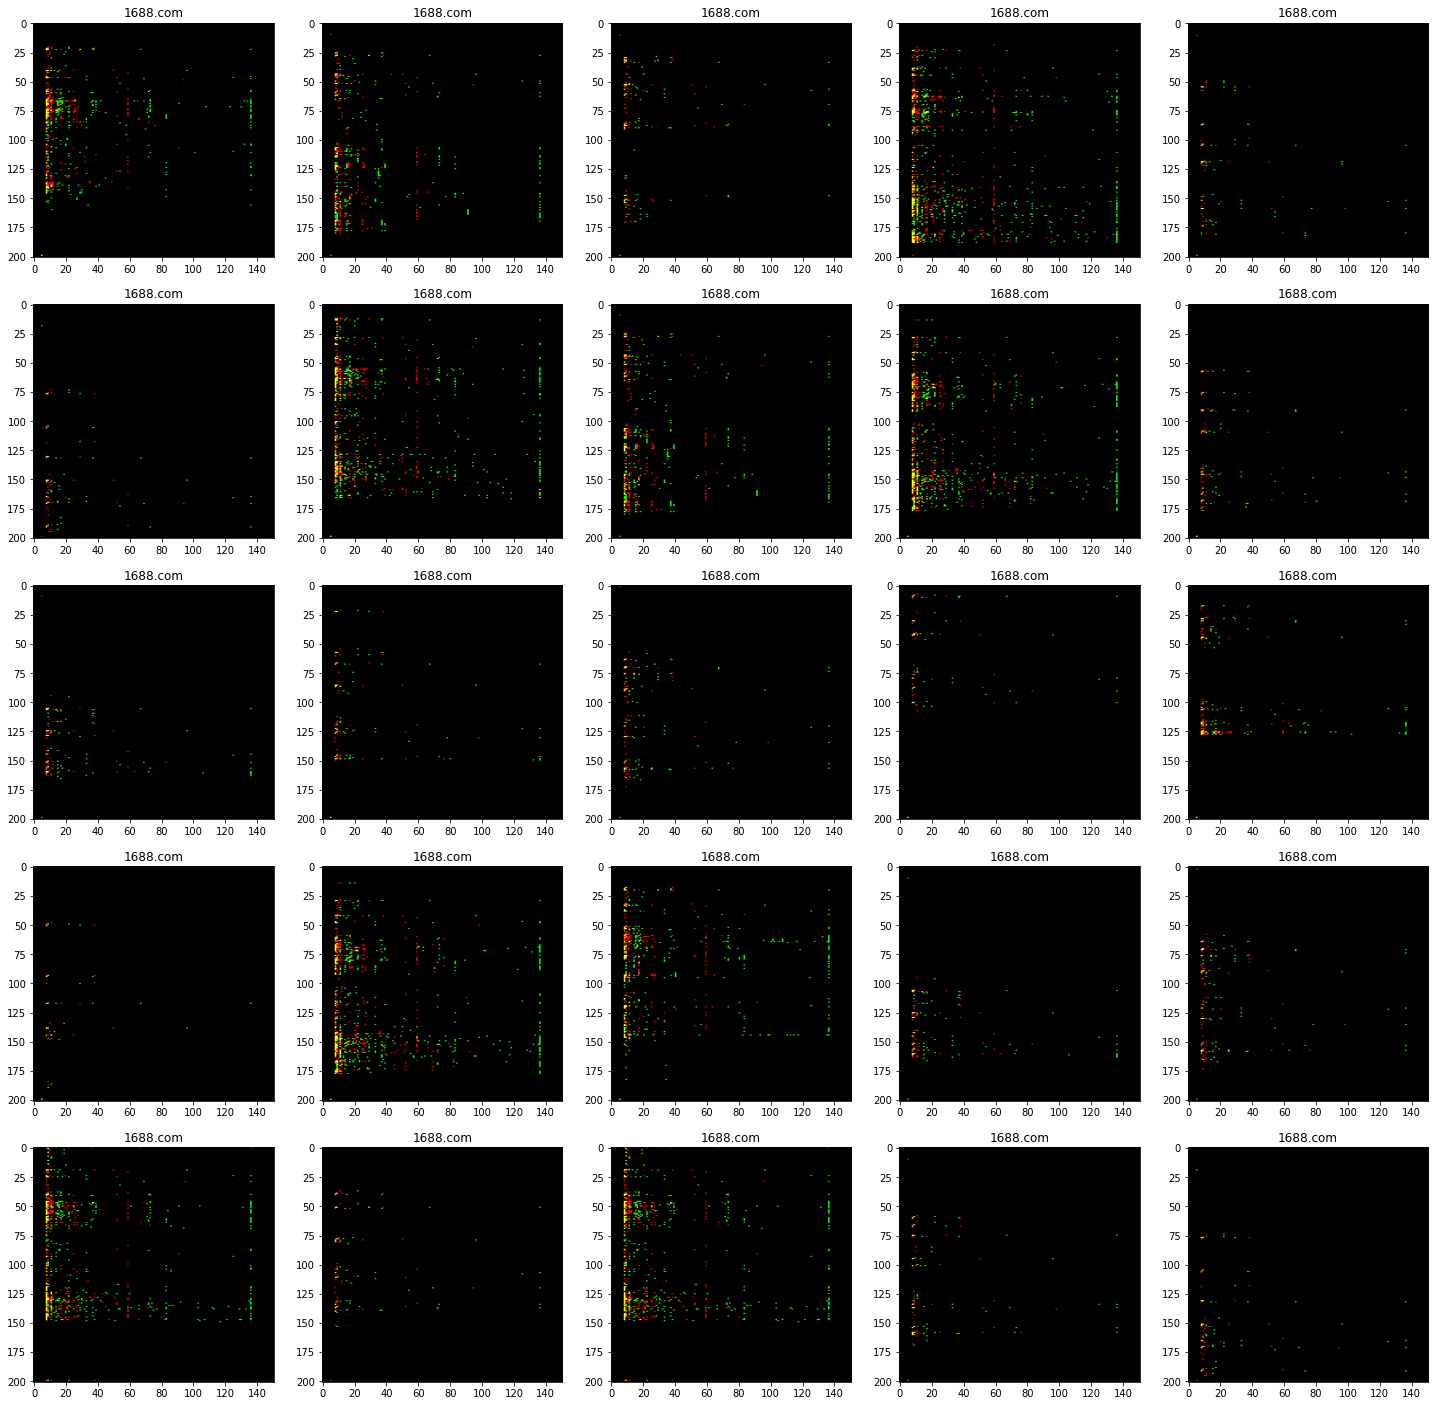

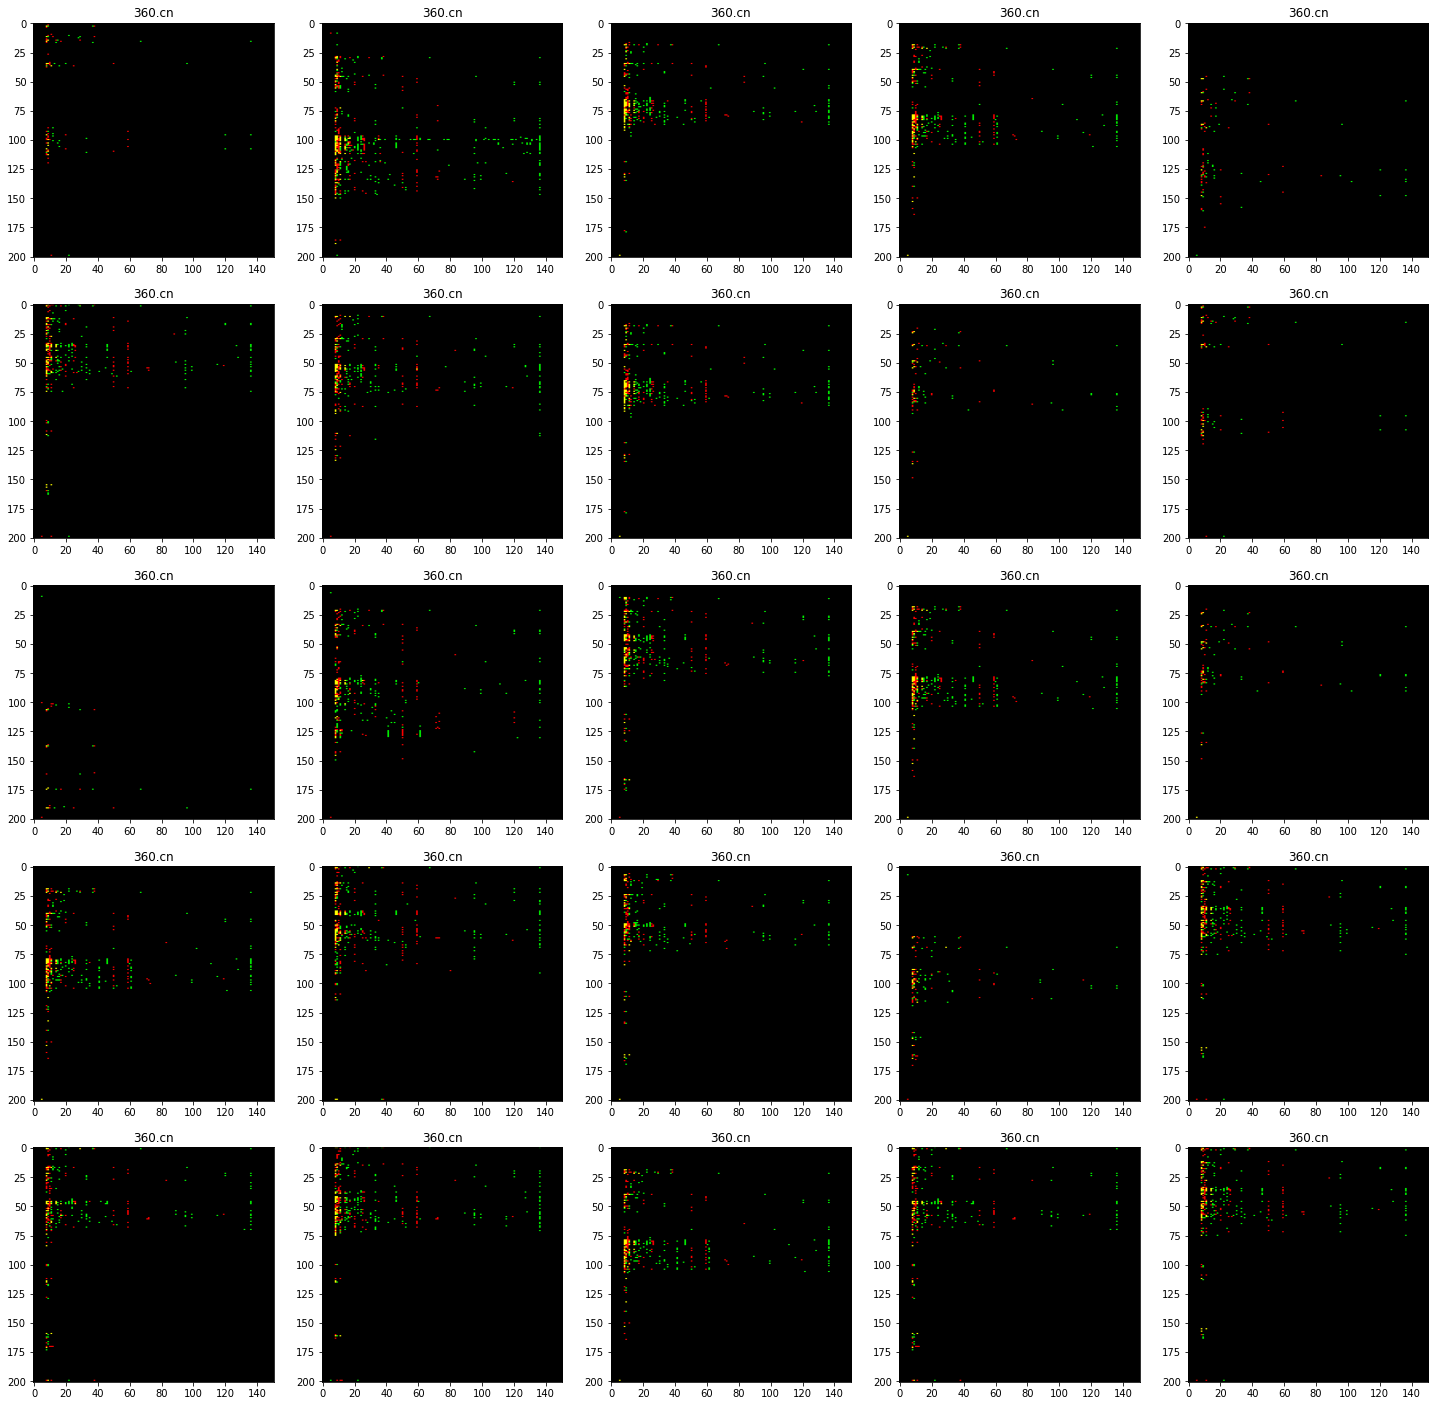

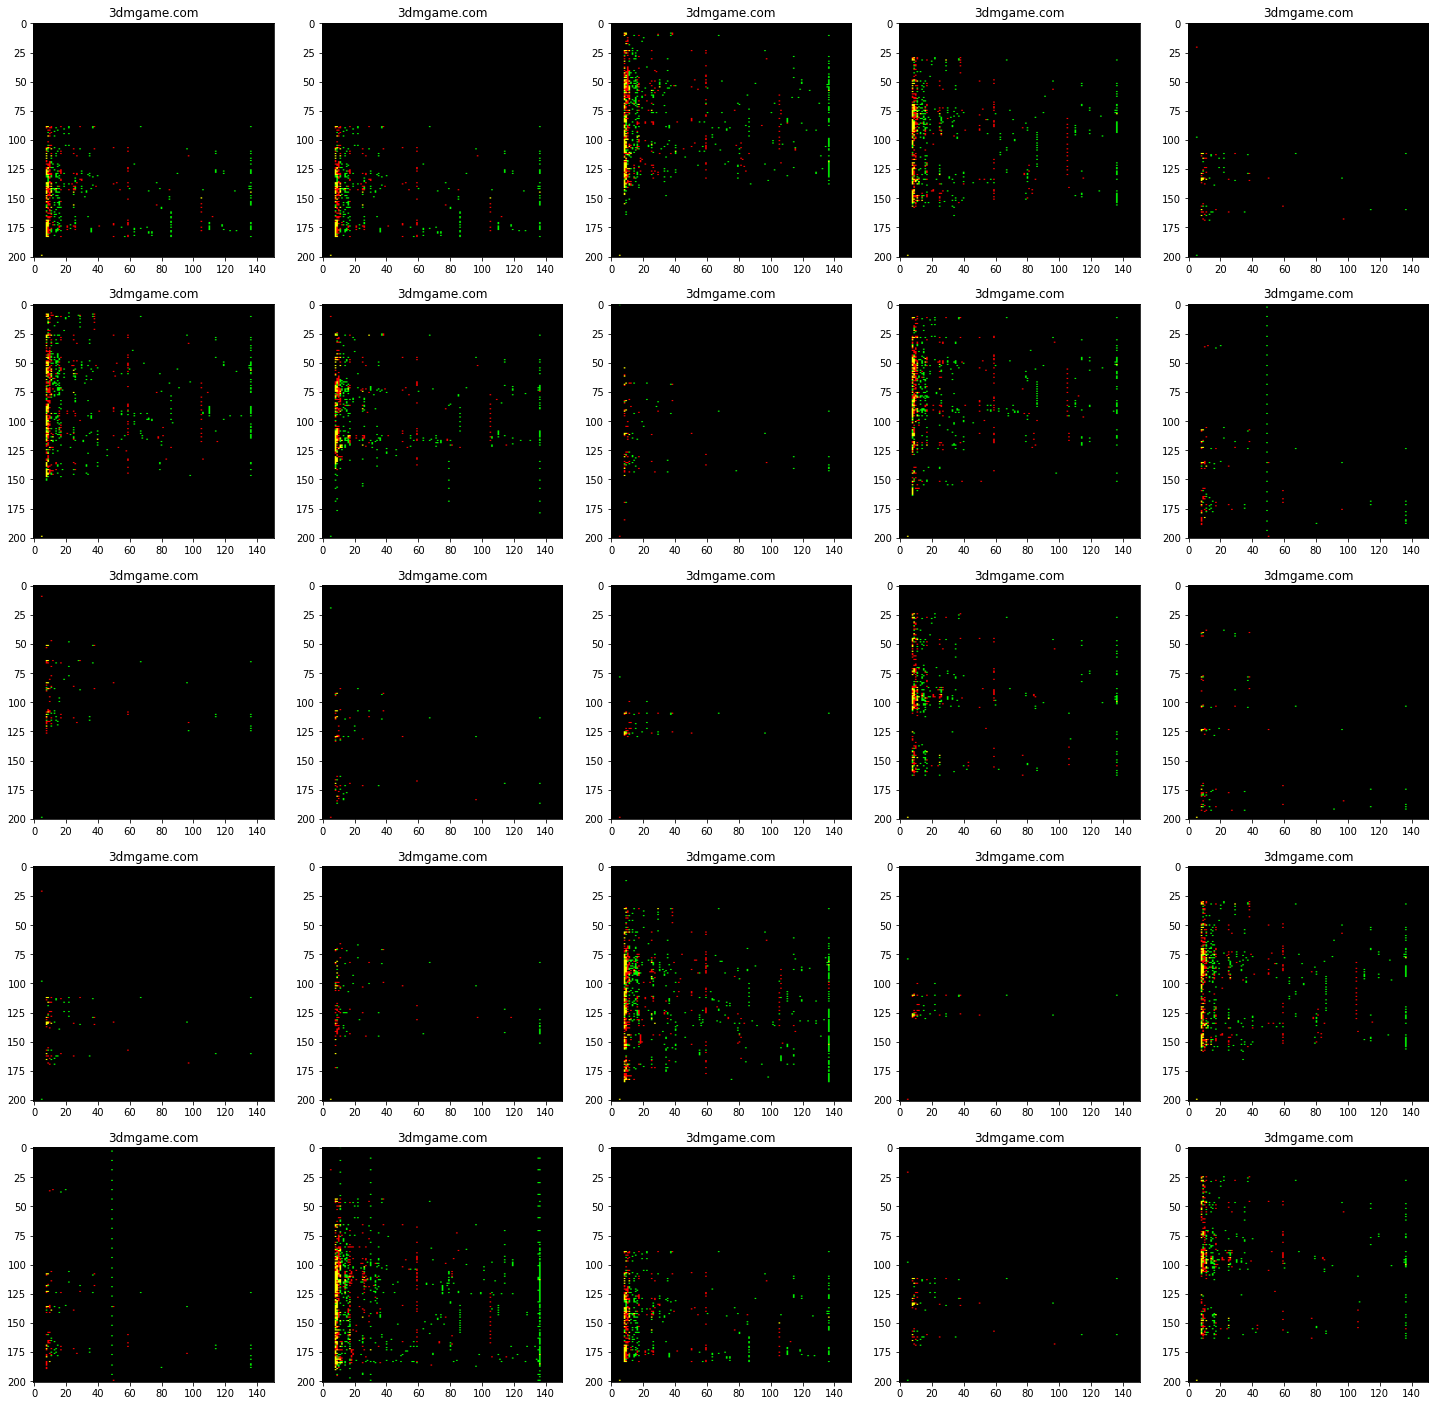

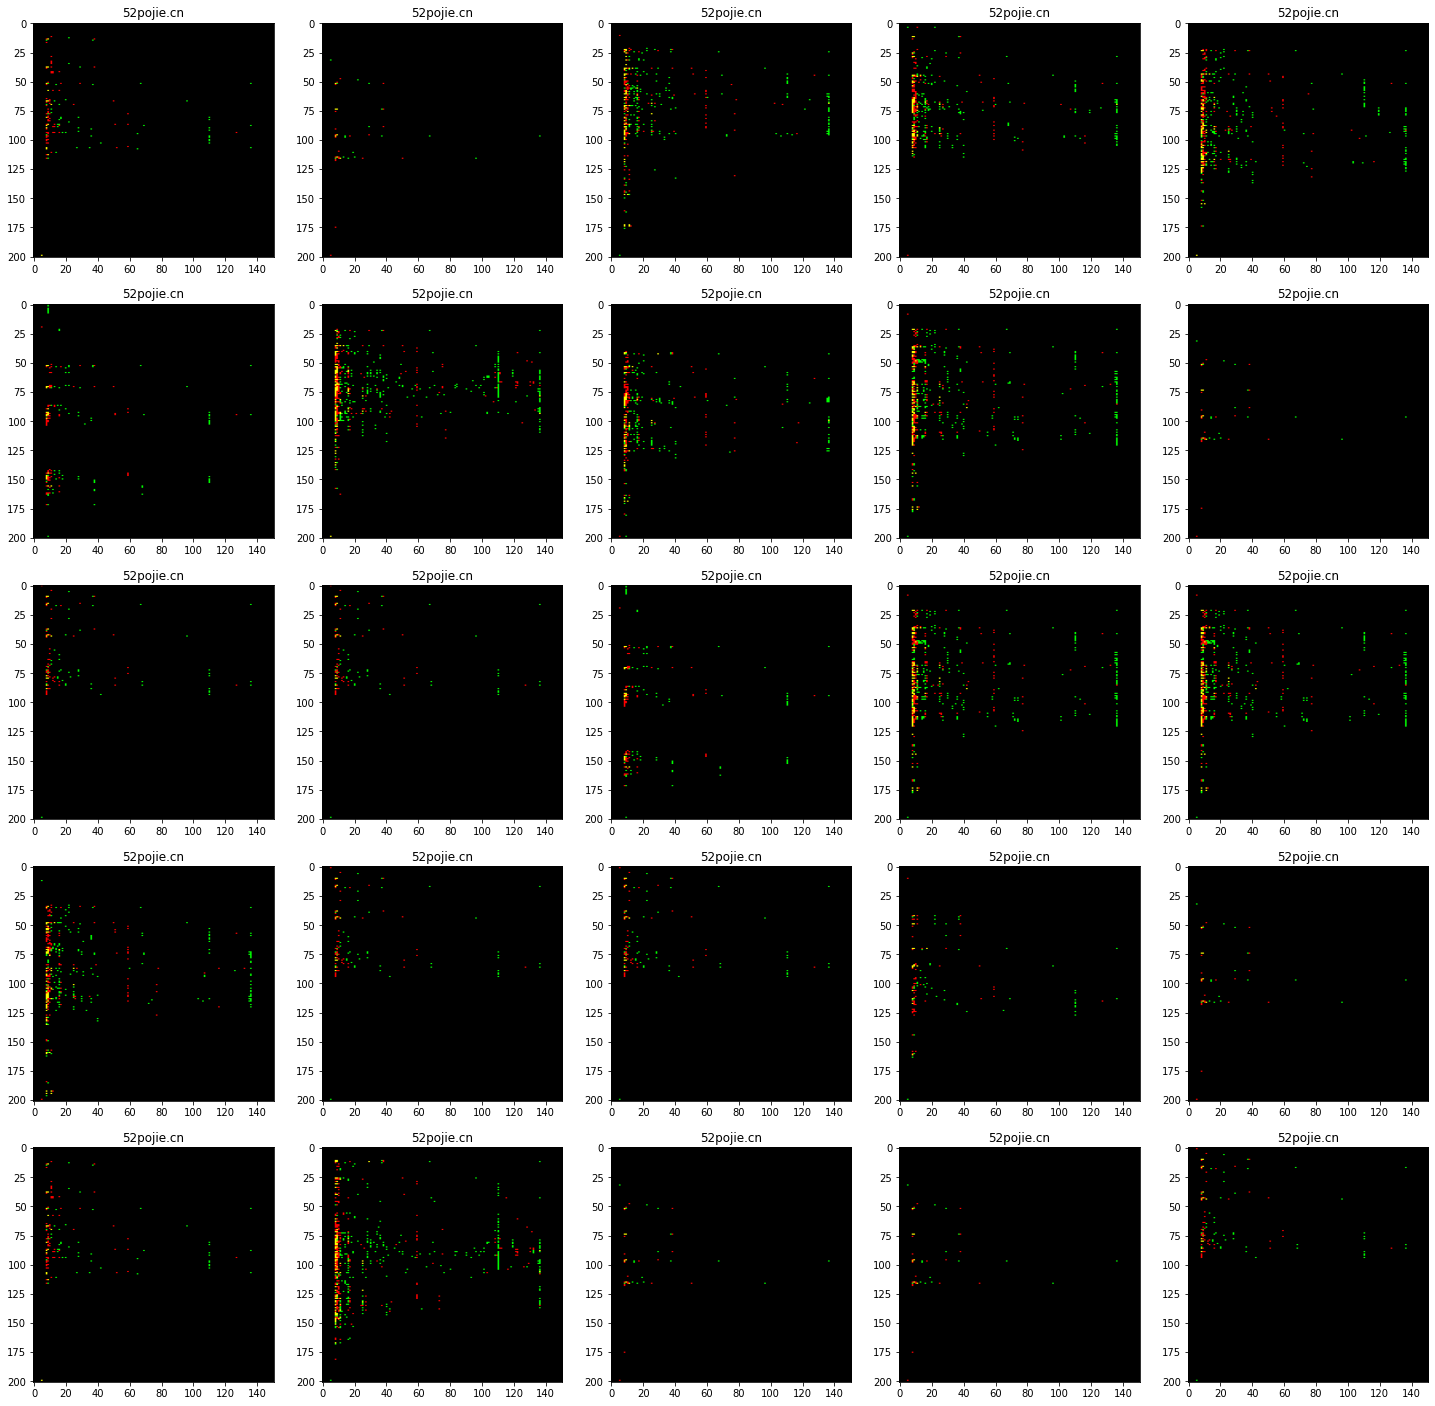

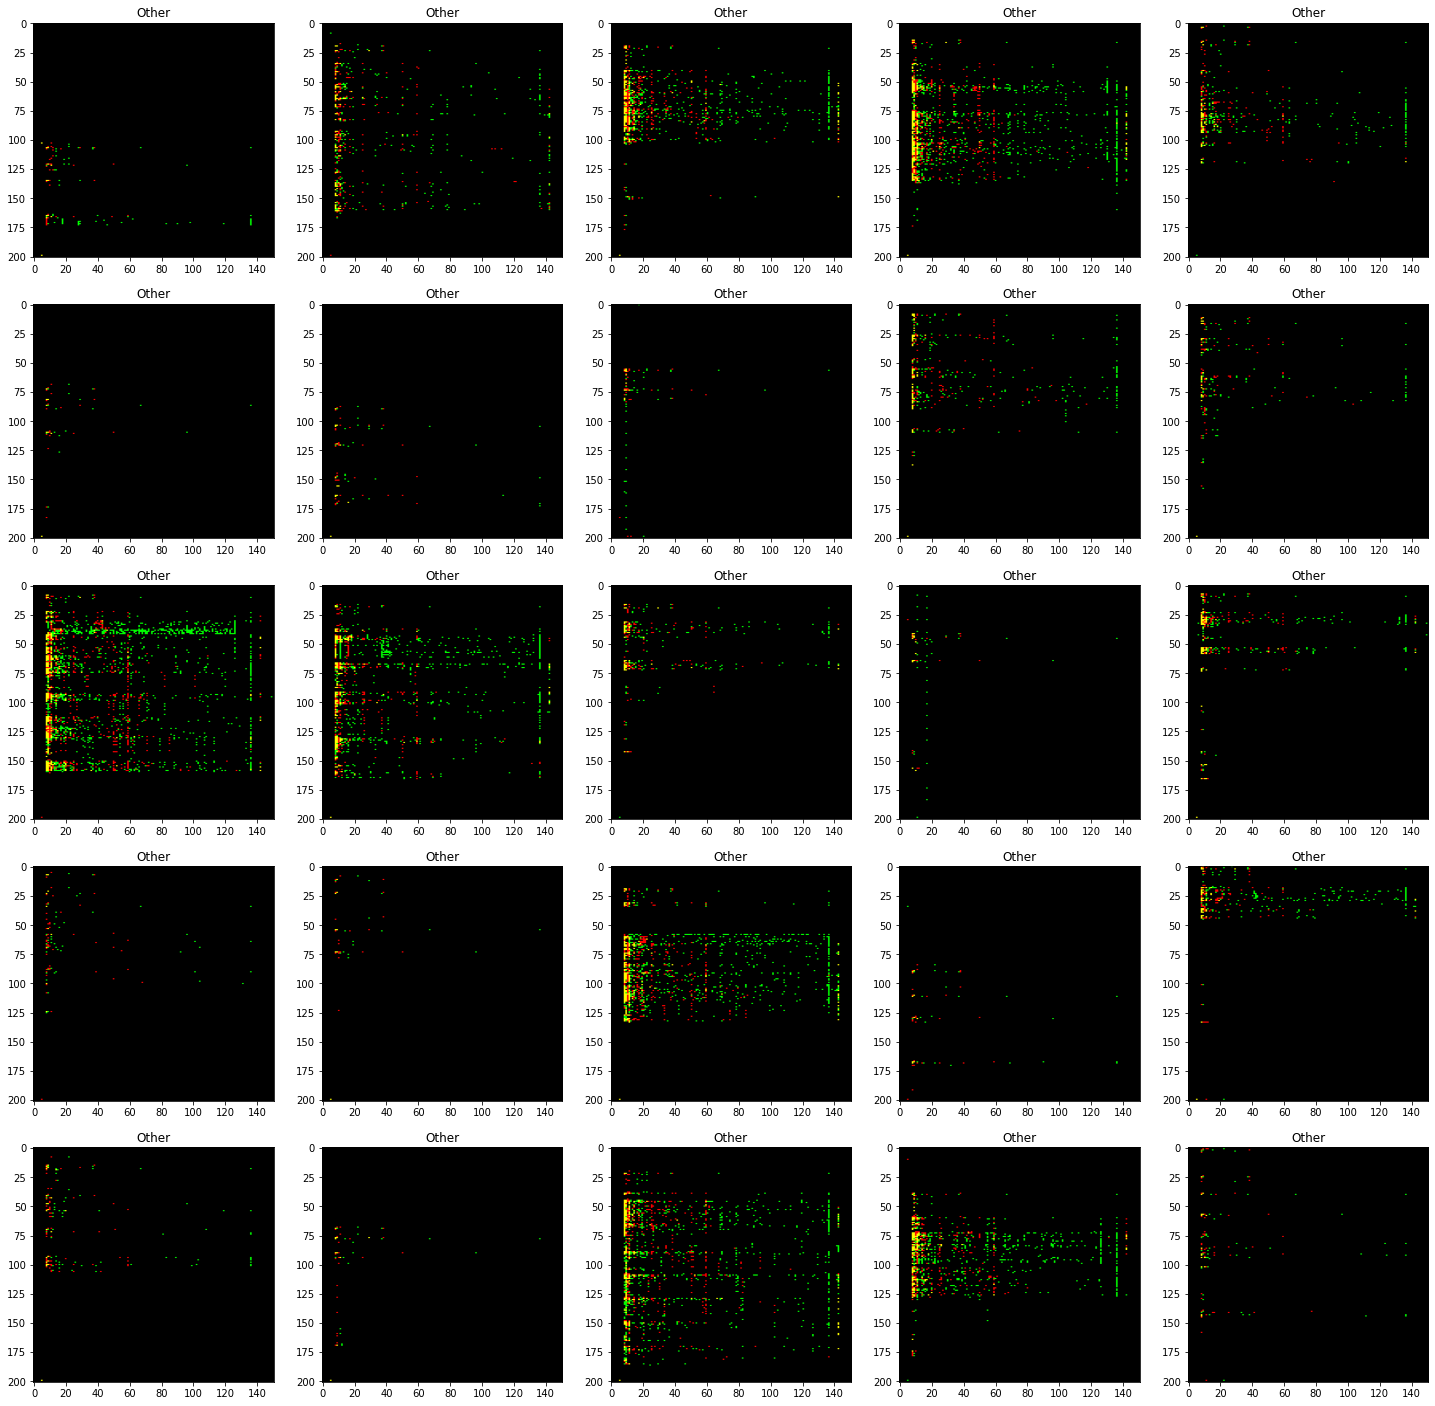

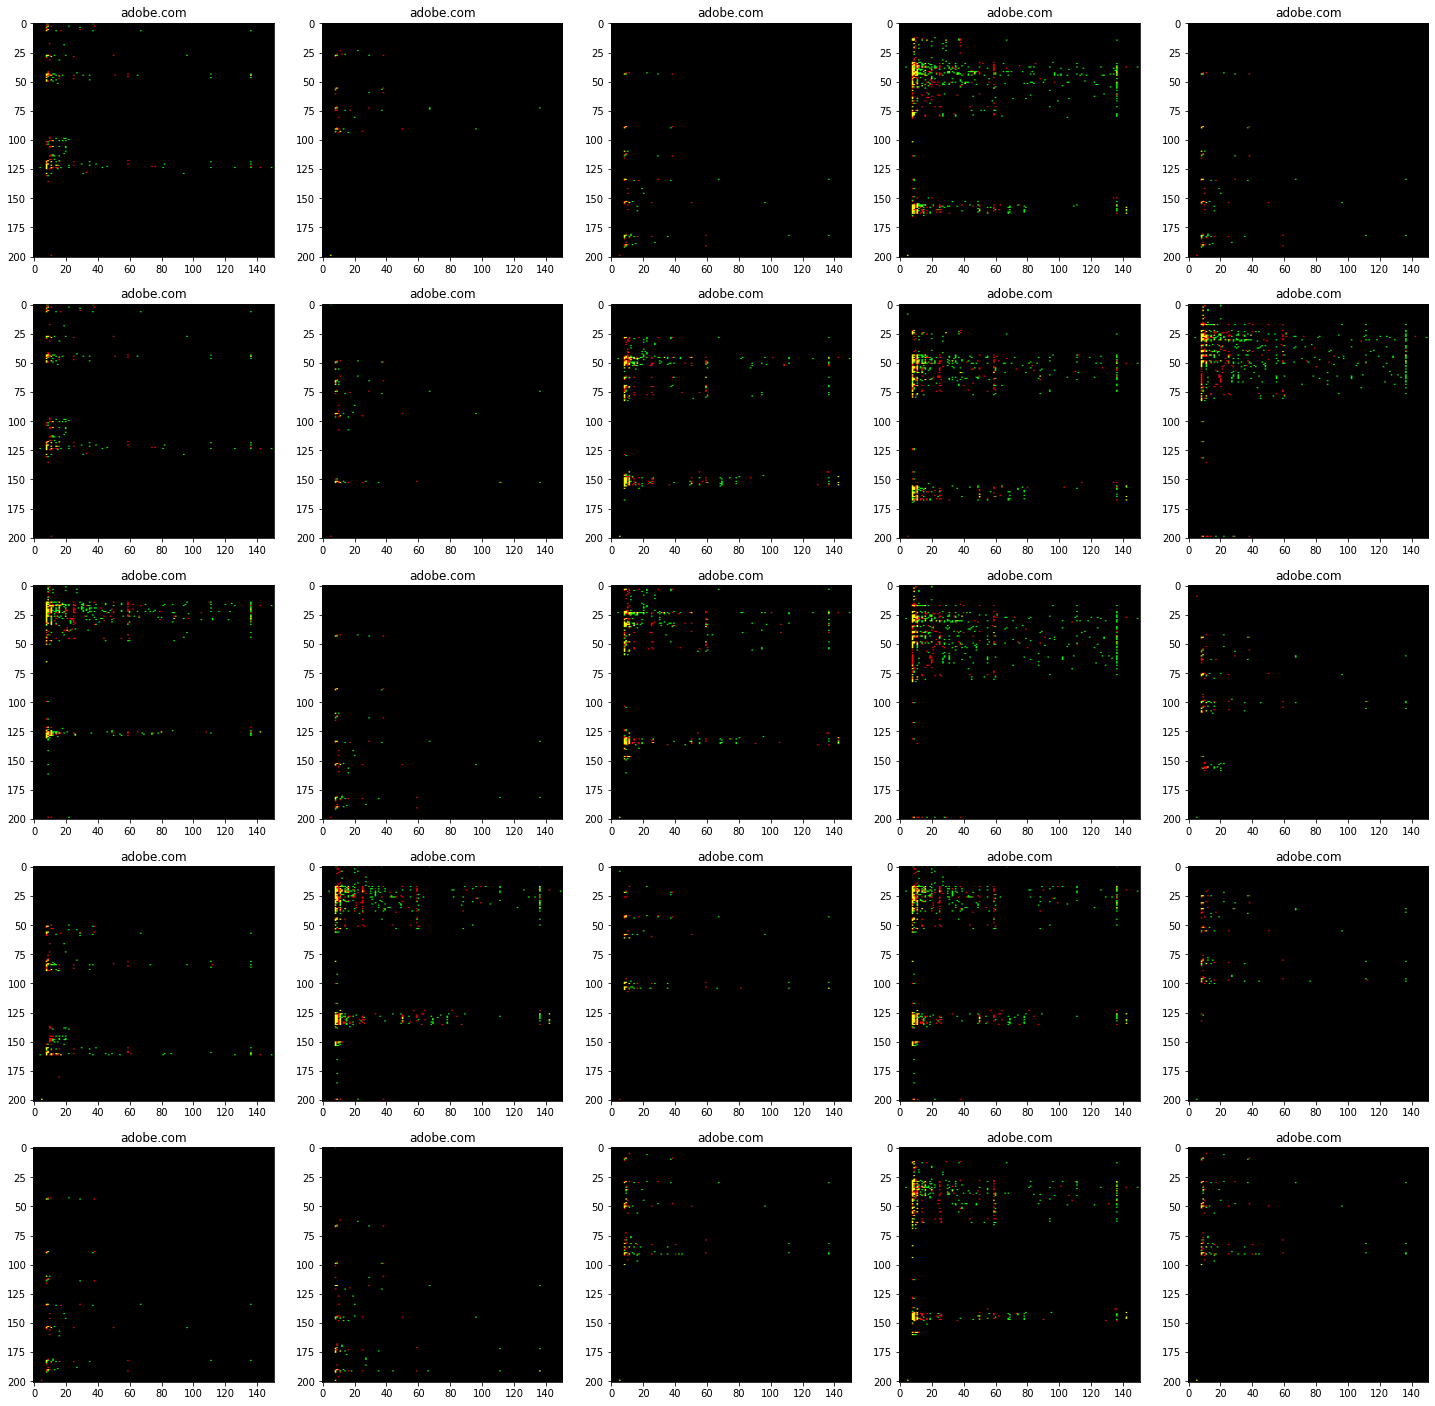

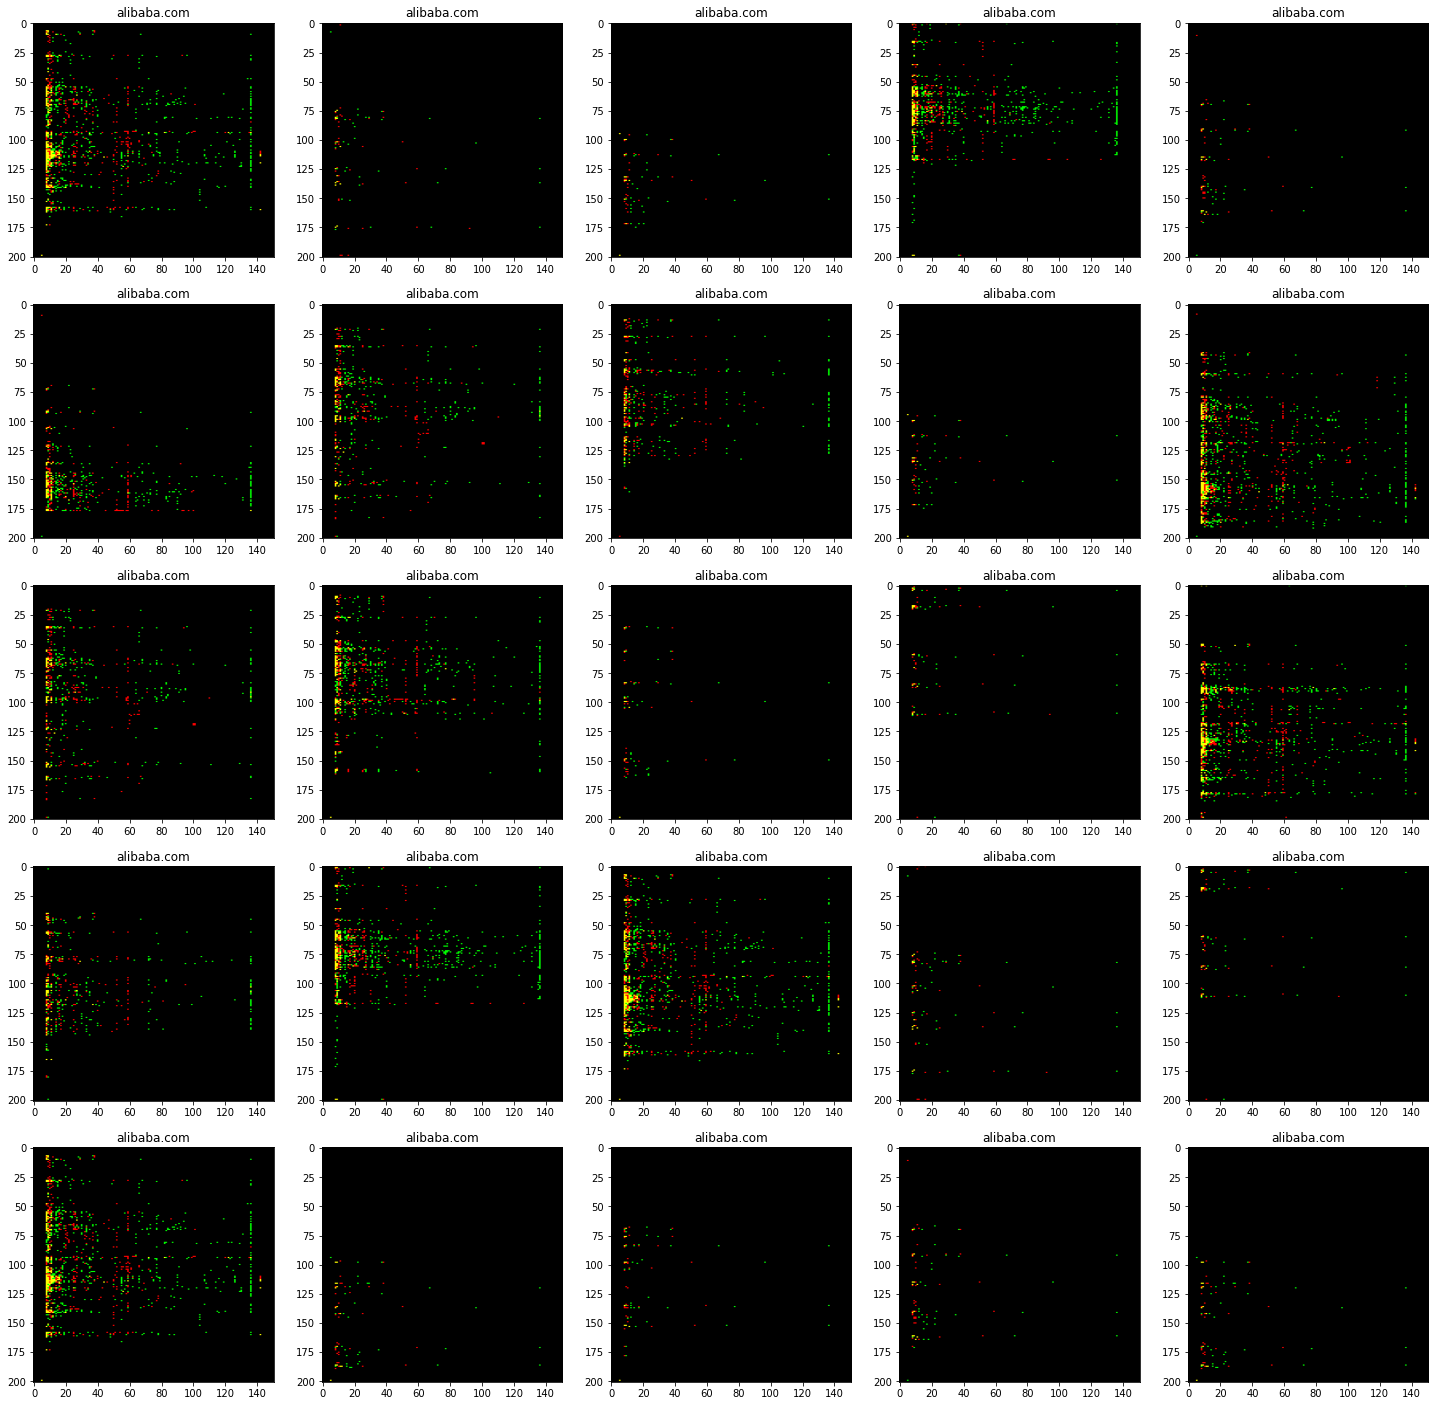

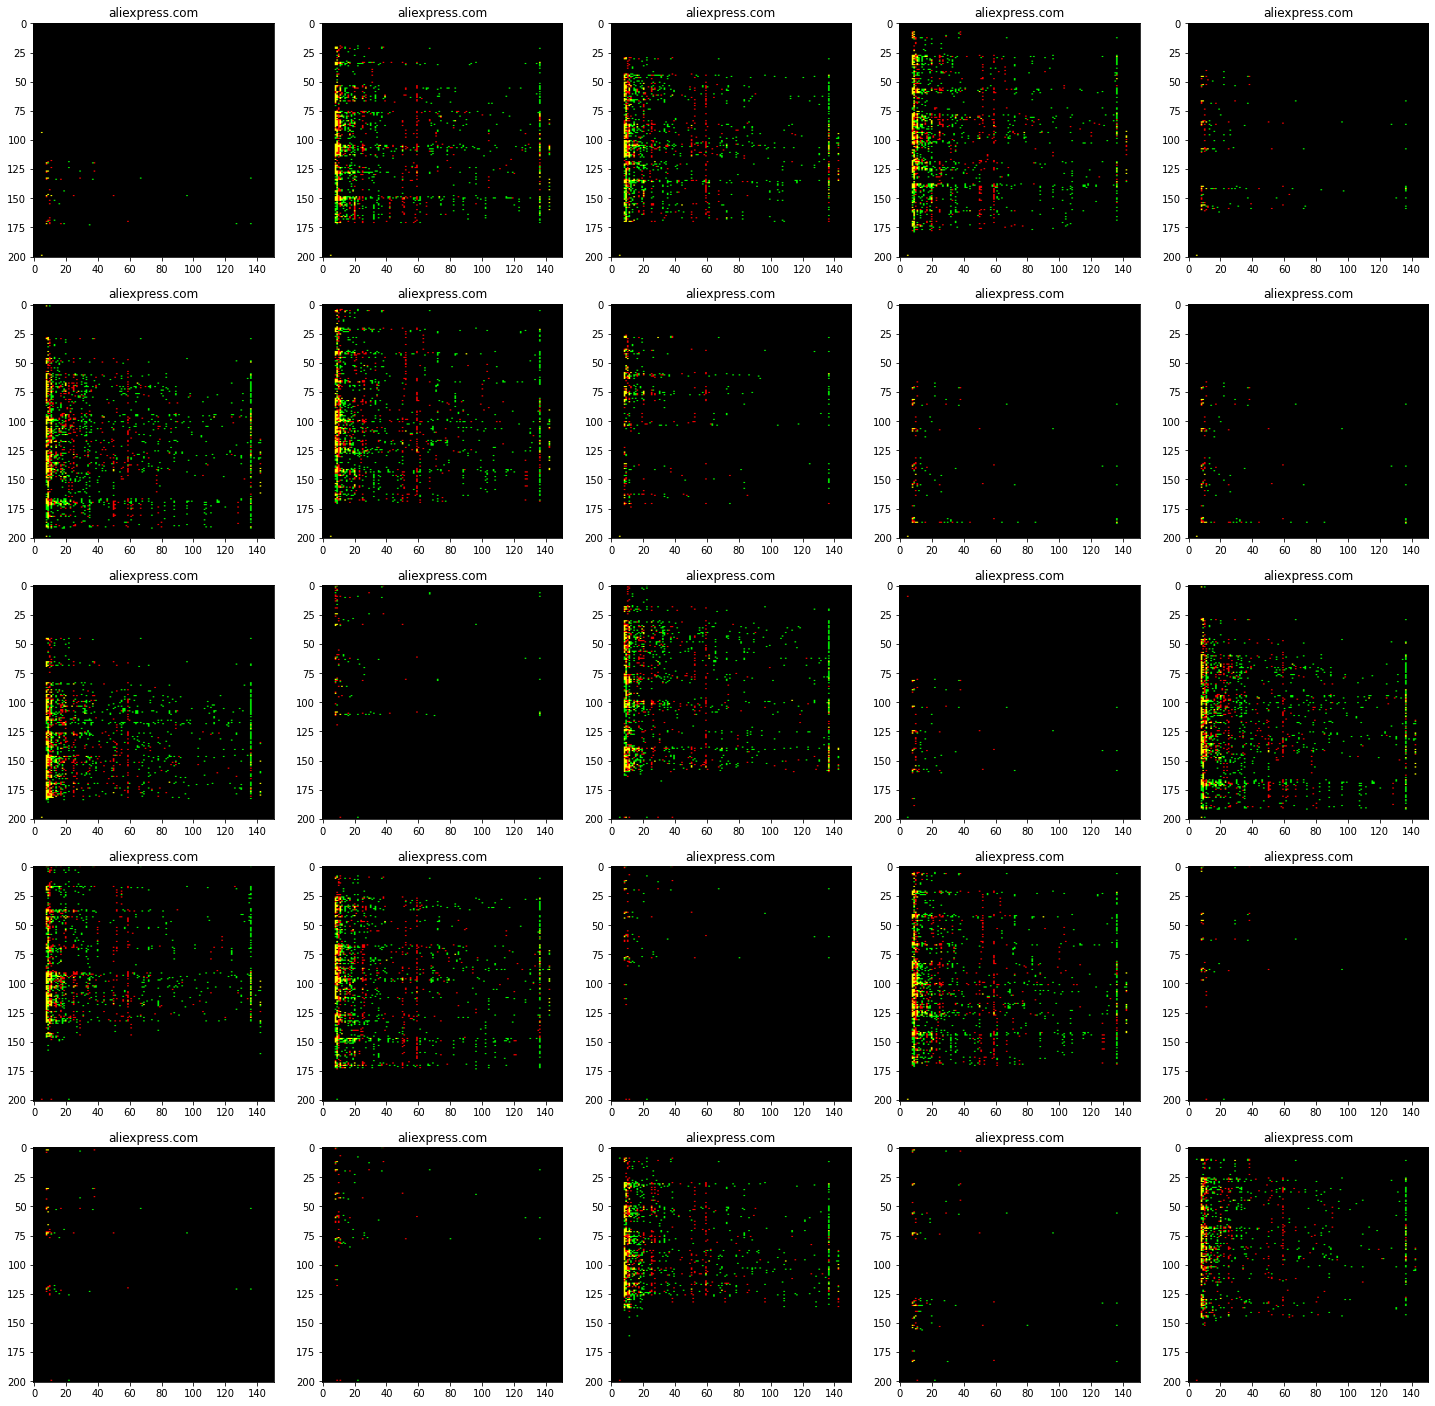

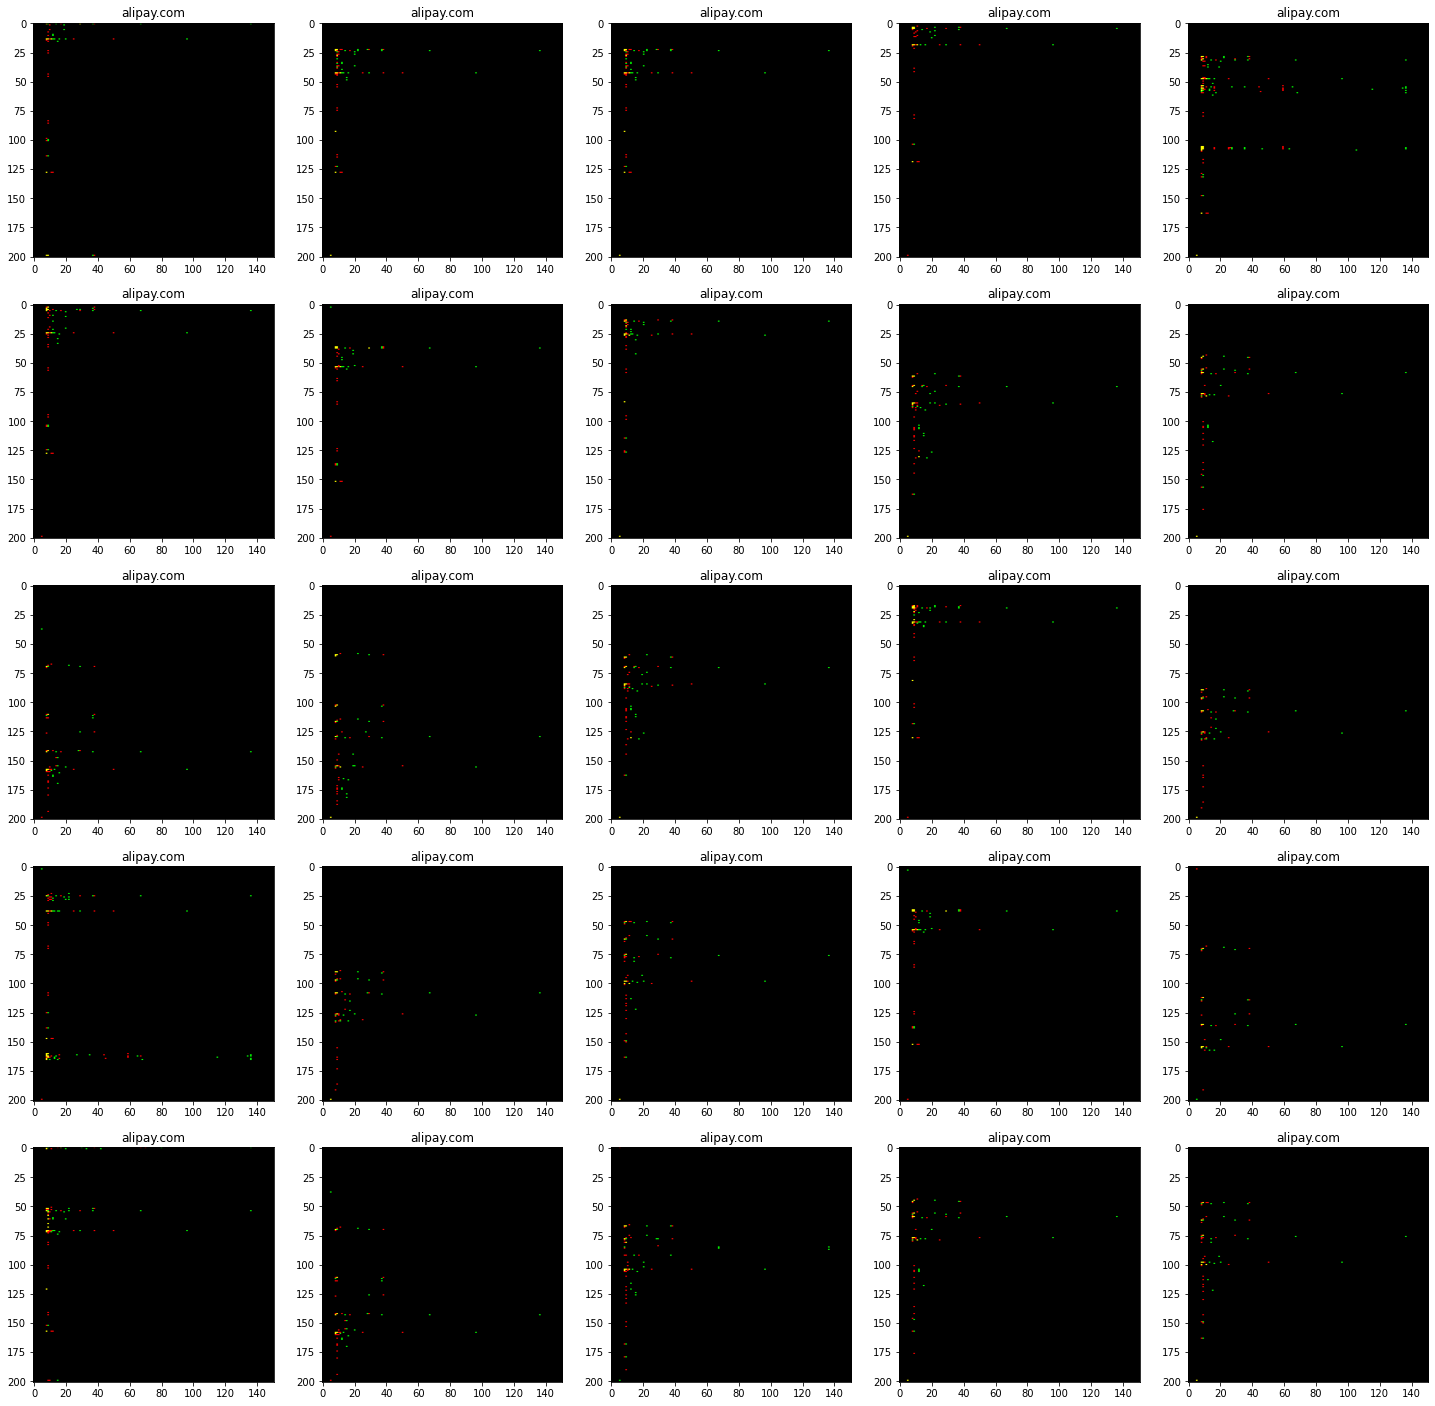

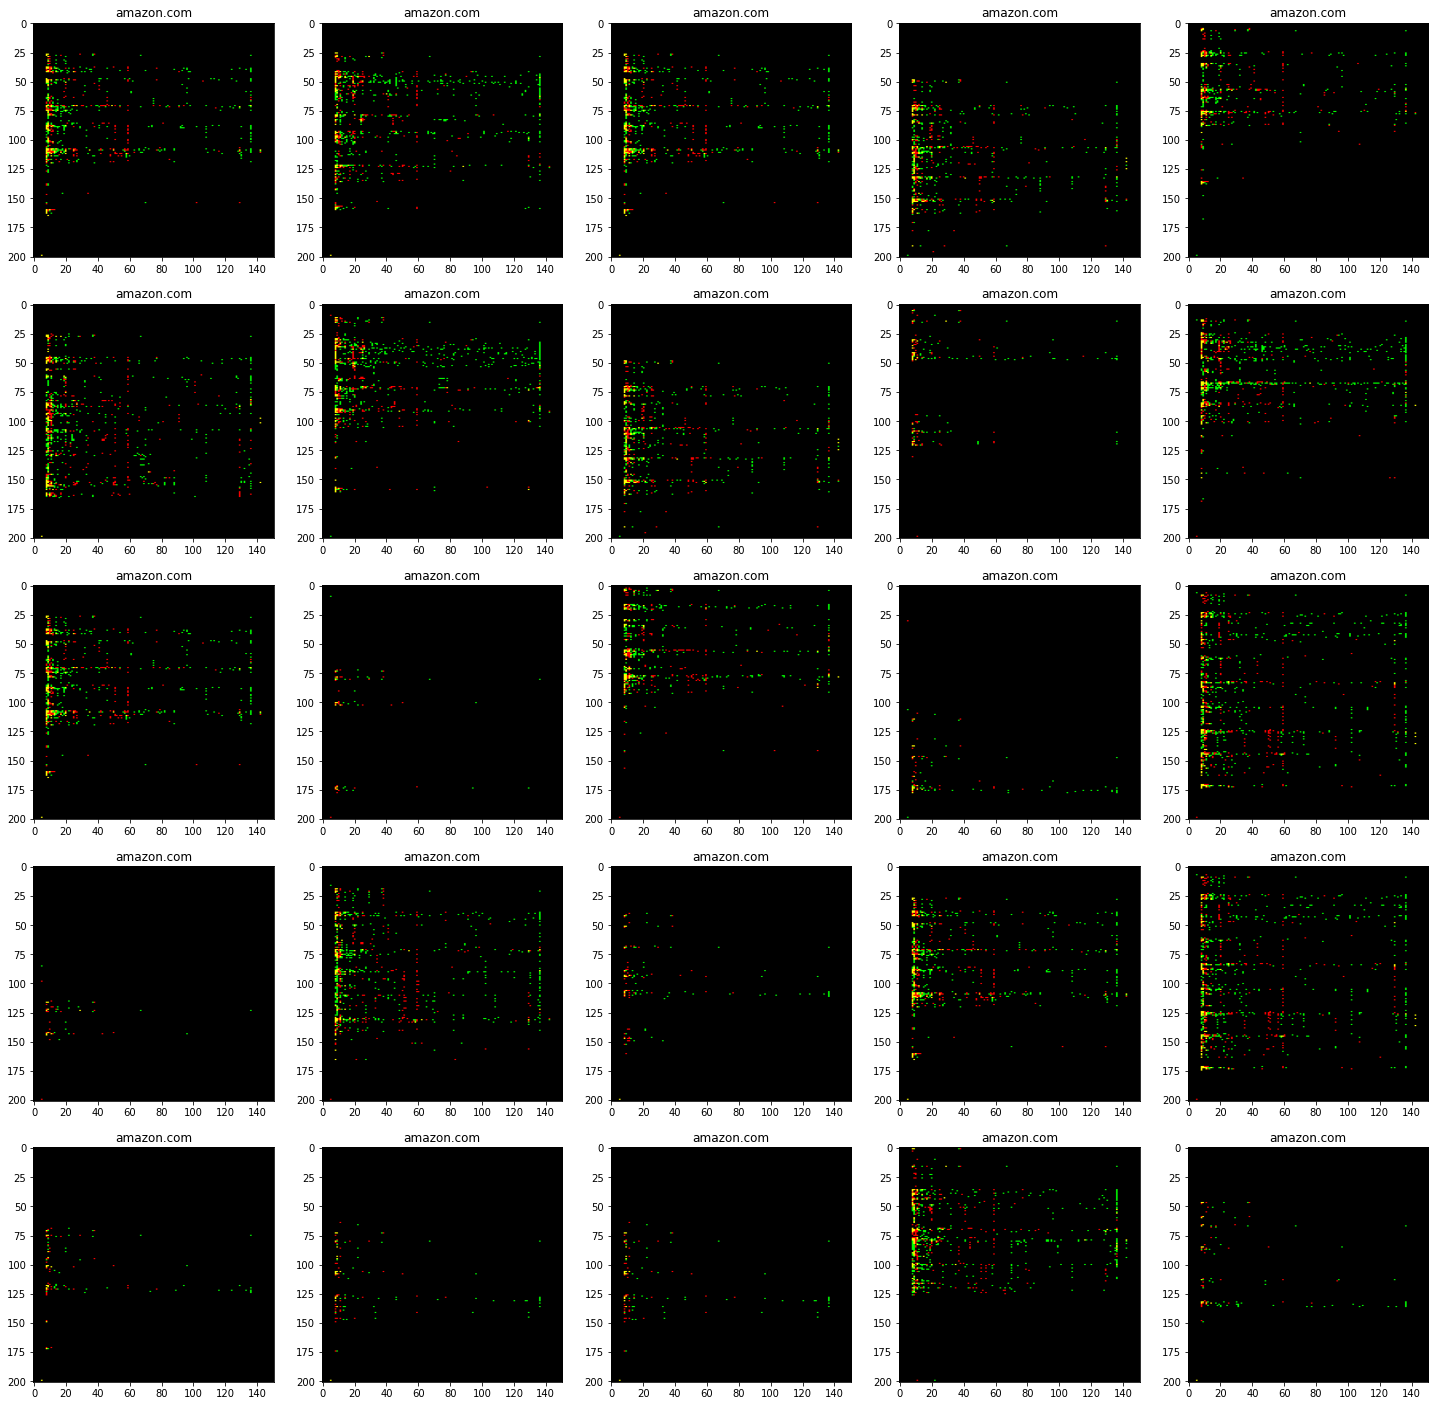

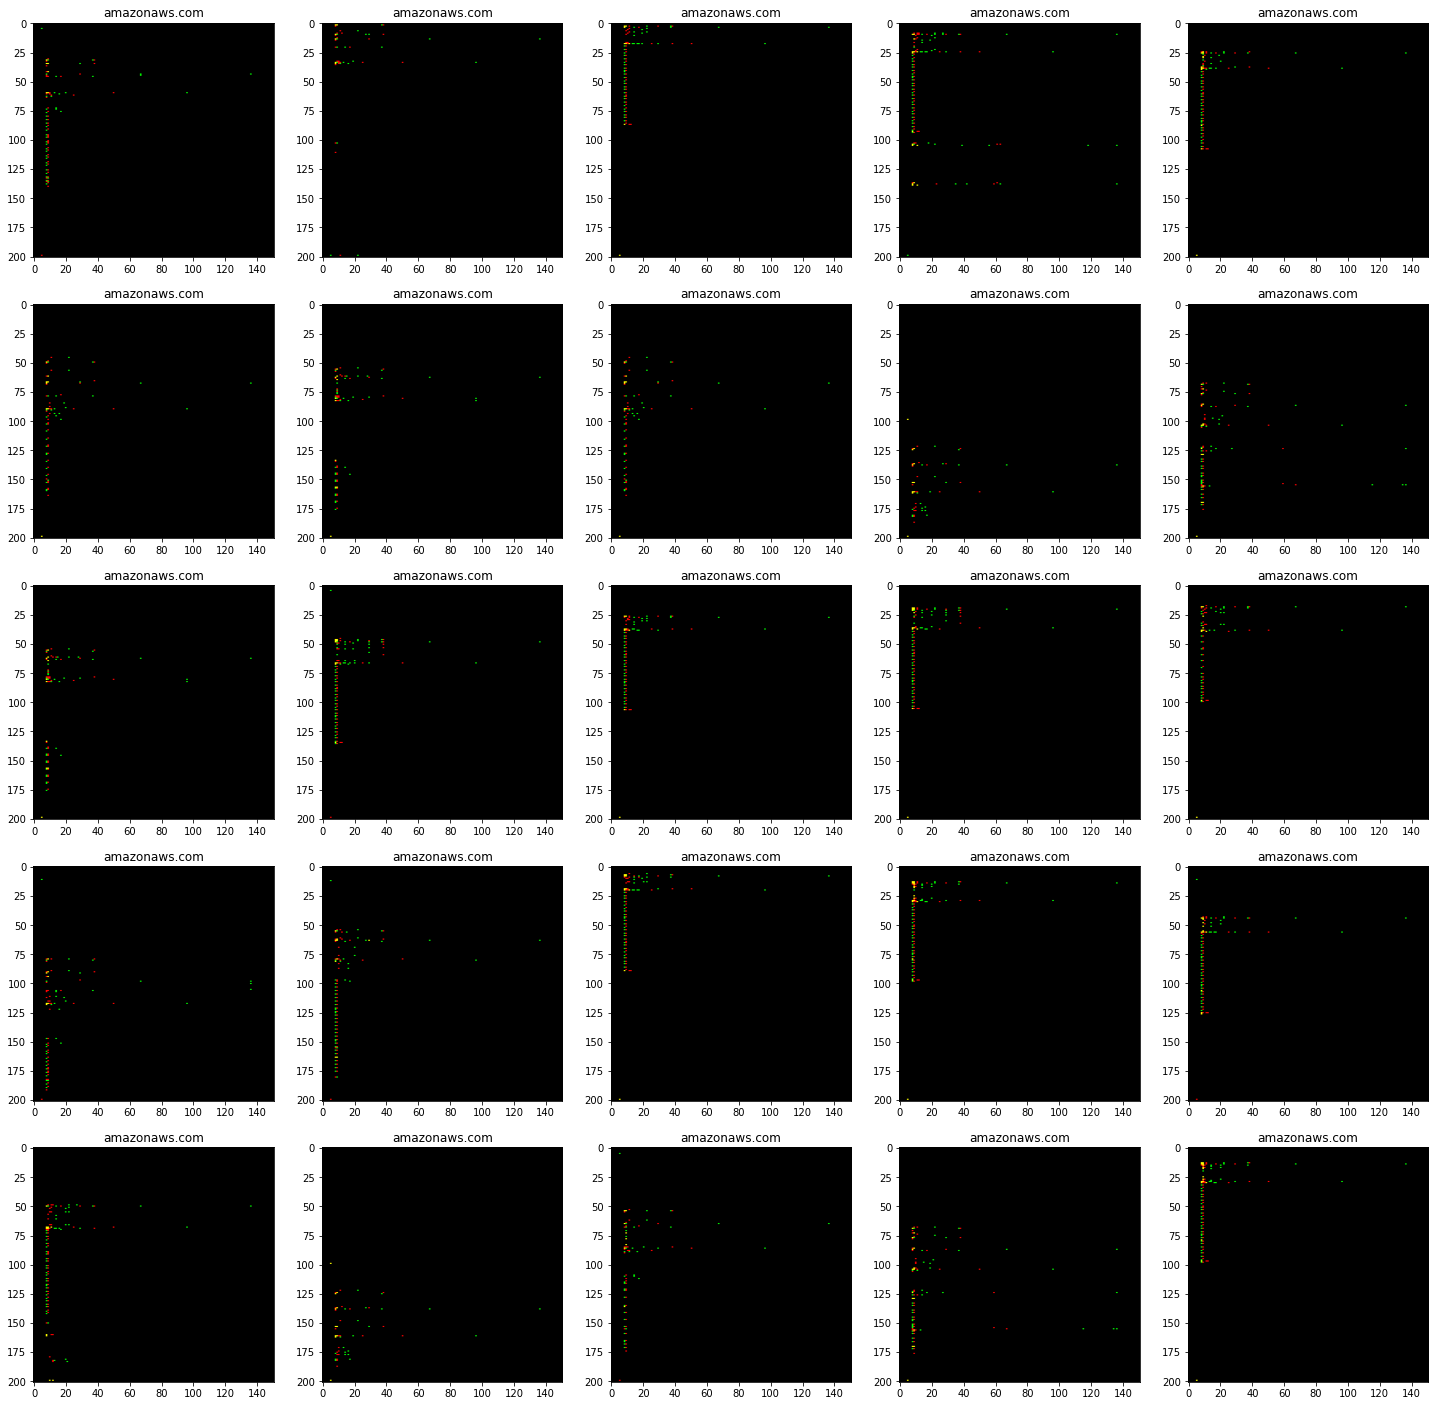

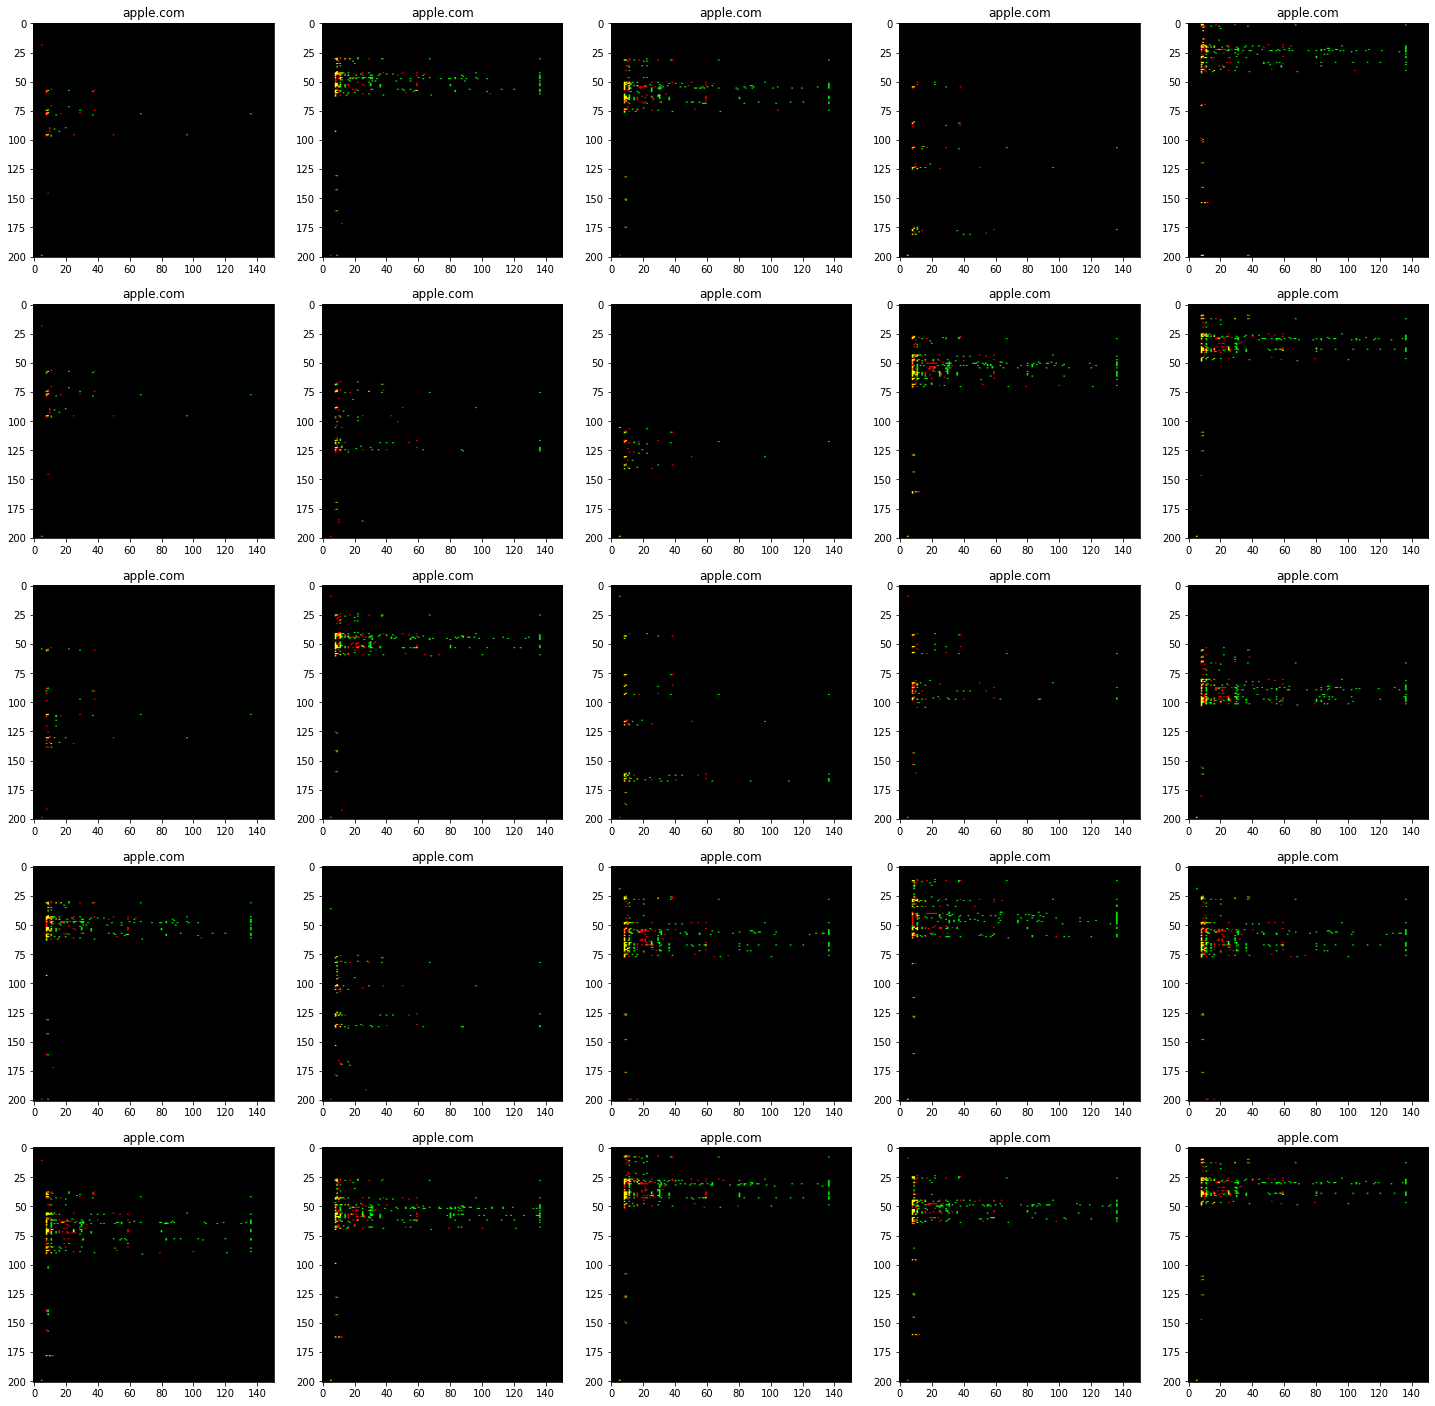

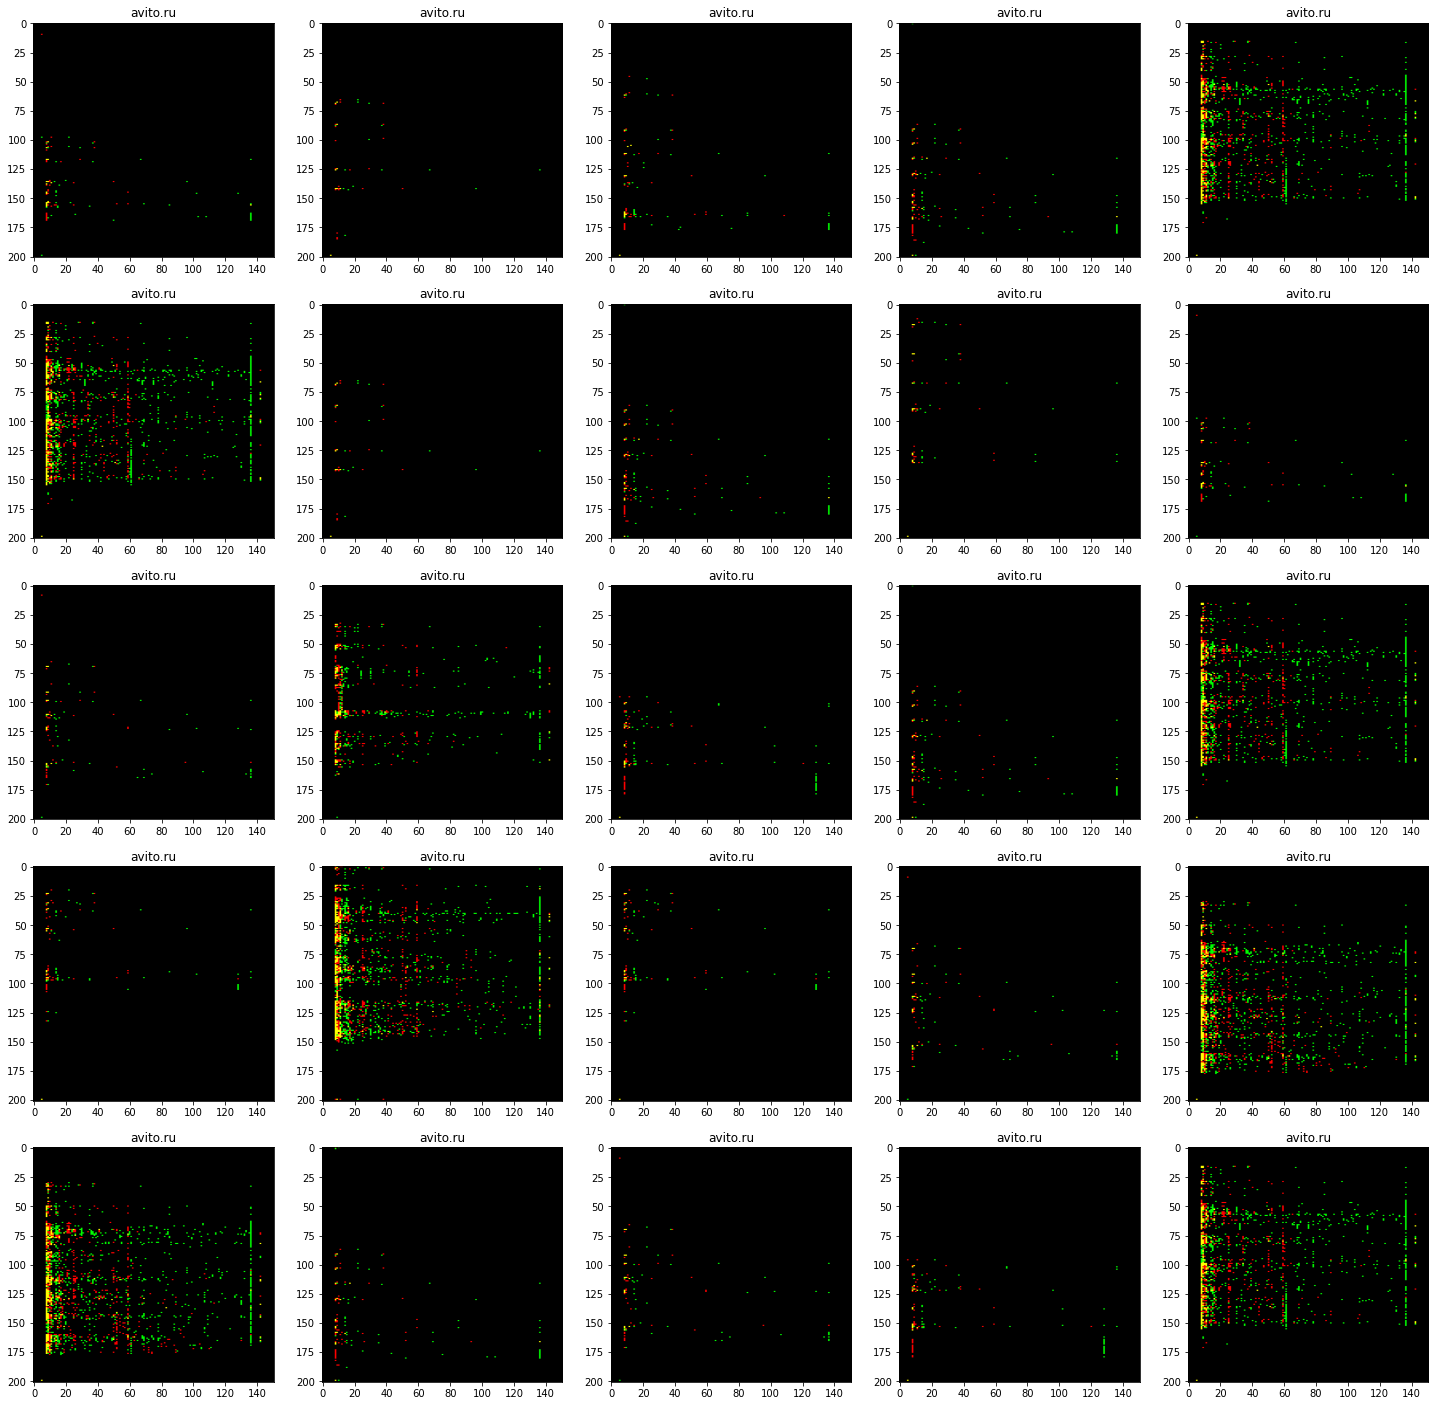

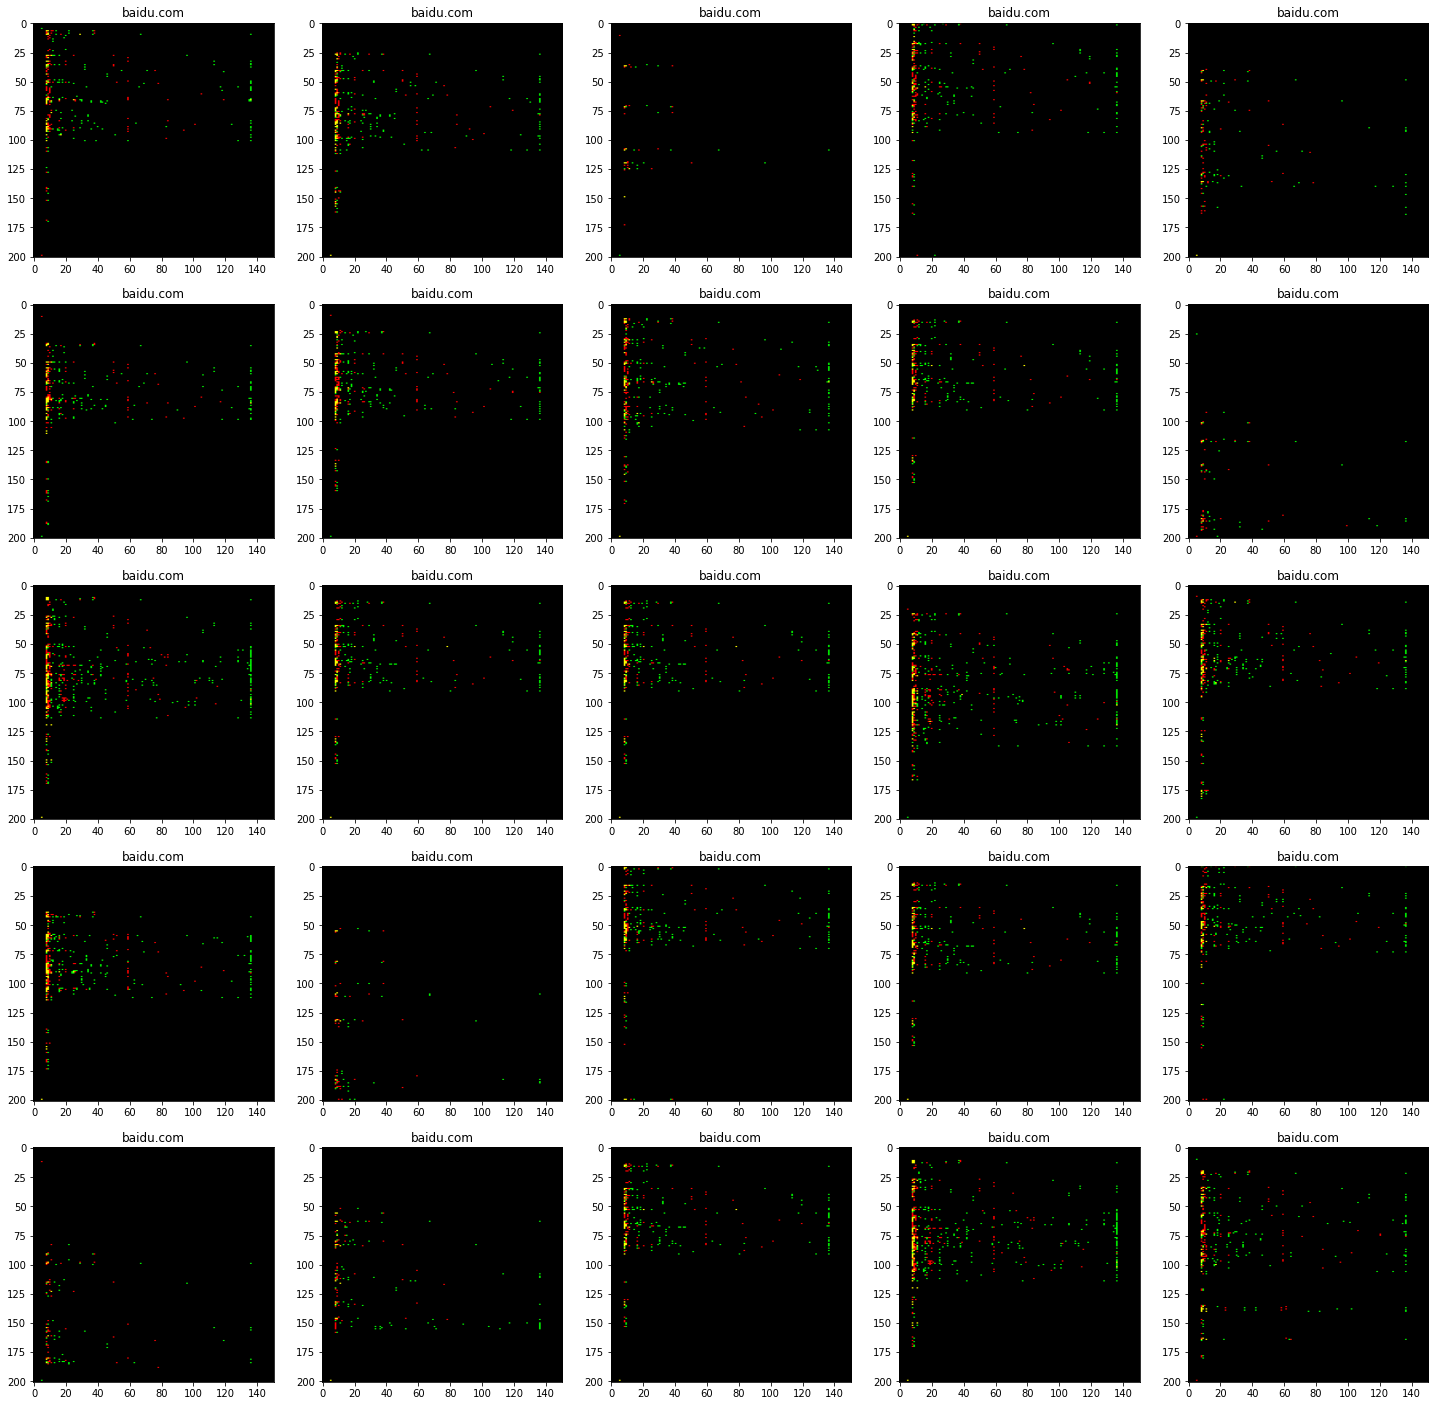

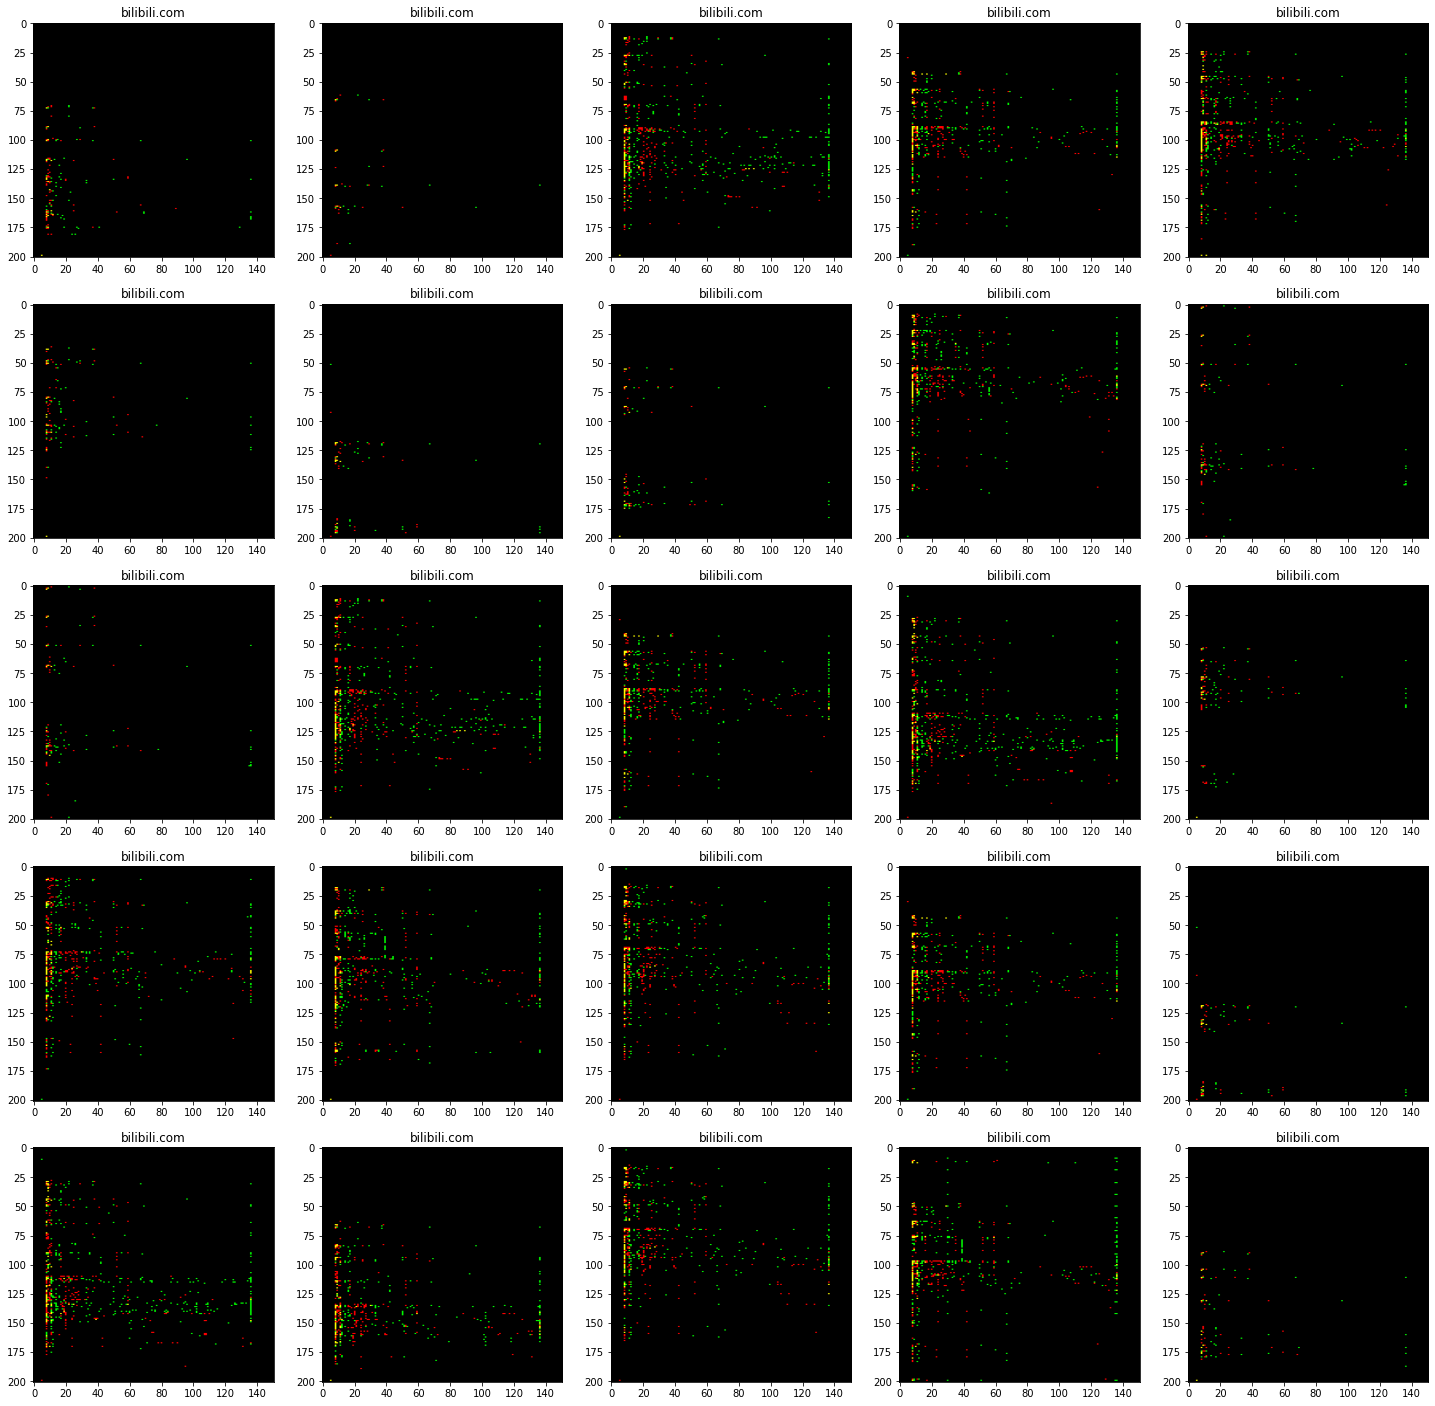

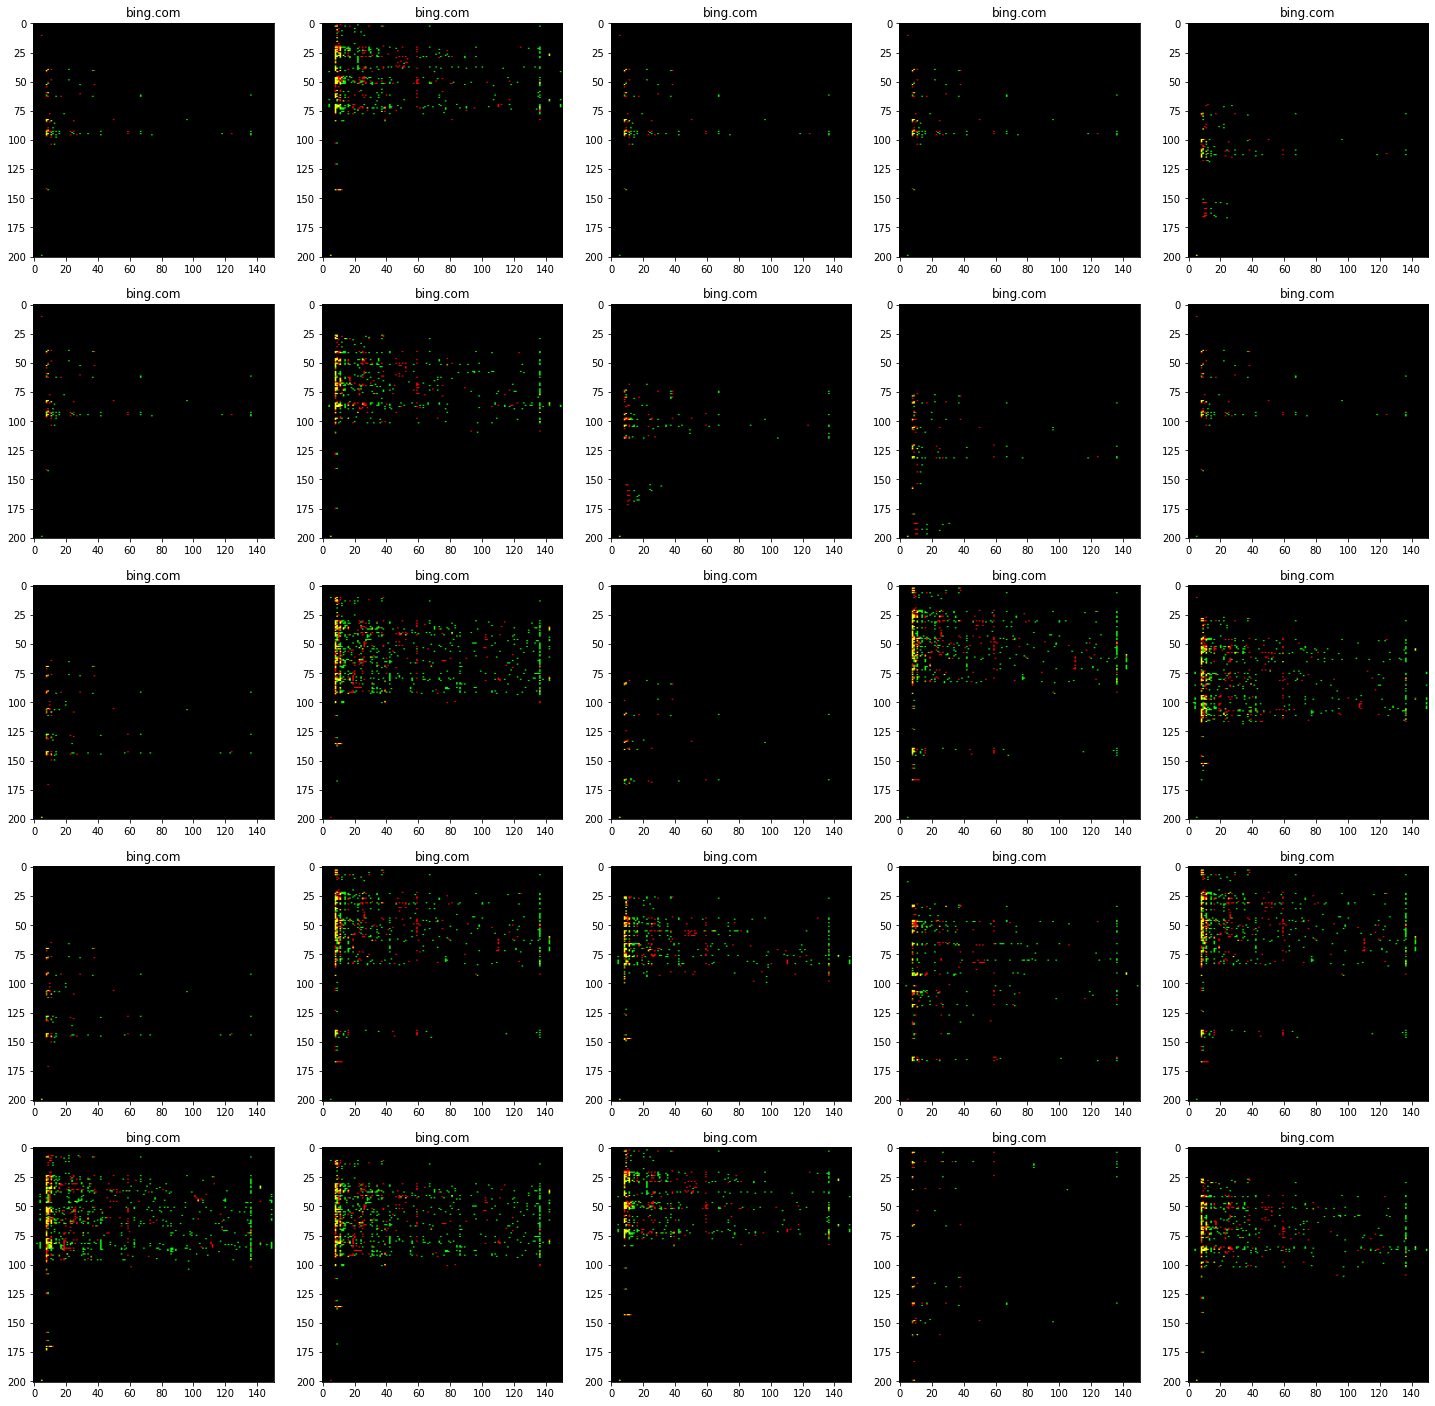

Error in callback <function flush_figures at 0x140883160> (for post_execute):


KeyboardInterrupt: 

In [26]:
for label in unique_labels:

    indexes = labels_df[labels_df.label == label].index

    plt.figure(figsize=(25,25))

    
    for i in range(25):
        plt.subplot(5, 5, i +1)
        random_idx = random.randint(0, len(indexes) -1)
        plt.imshow(np.pad(features[indexes[random_idx]], (0,1)), aspect="auto")
        plt.title(f"{label}")